# Income Classification

### Importing Libraries

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Income_Data.csv')

In [6]:
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [7]:
df.tail()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,NaN
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,NaN
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,NaN
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,NaN
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [9]:
df.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,Unnamed: 15
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,2.0
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,55000.0
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,55000.0
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,55000.0
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,55000.0
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,55000.0
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,55000.0


    Since "Unnamed: 15" does not contain any data, it can be eliminated from the input field.

In [10]:
df.drop(['Unnamed: 15'],axis=1,inplace=True)

### Distribution analysis

#### Skewness

In [11]:
skew =pd.DataFrame()
skew.index = df.skew().index
skew['Skewness'] = df.skew().values

skew

,Skewness
Age,0.558743
Final_census,1.446980
Education-num,-0.311676
capital-gain,11.953848
capital-loss,4.594629
hours-per-week,0.227643


#### Kurtosis

In [12]:
kurt =pd.DataFrame()
kurt.index = df.kurt().index
kurt['Kurtosis'] = df.kurt().values

kurt

,Kurtosis
Age,-0.166127
Final_census,6.218811
Education-num,0.623444
capital-gain,154.799438
capital-loss,20.376802
hours-per-week,2.916687


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Final_census'}>],
       [<AxesSubplot:title={'center':' Education-num'}>,
        <AxesSubplot:title={'center':' capital-gain'}>],
       [<AxesSubplot:title={'center':' capital-loss'}>,
        <AxesSubplot:title={'center':' hours-per-week'}>]], dtype=object)

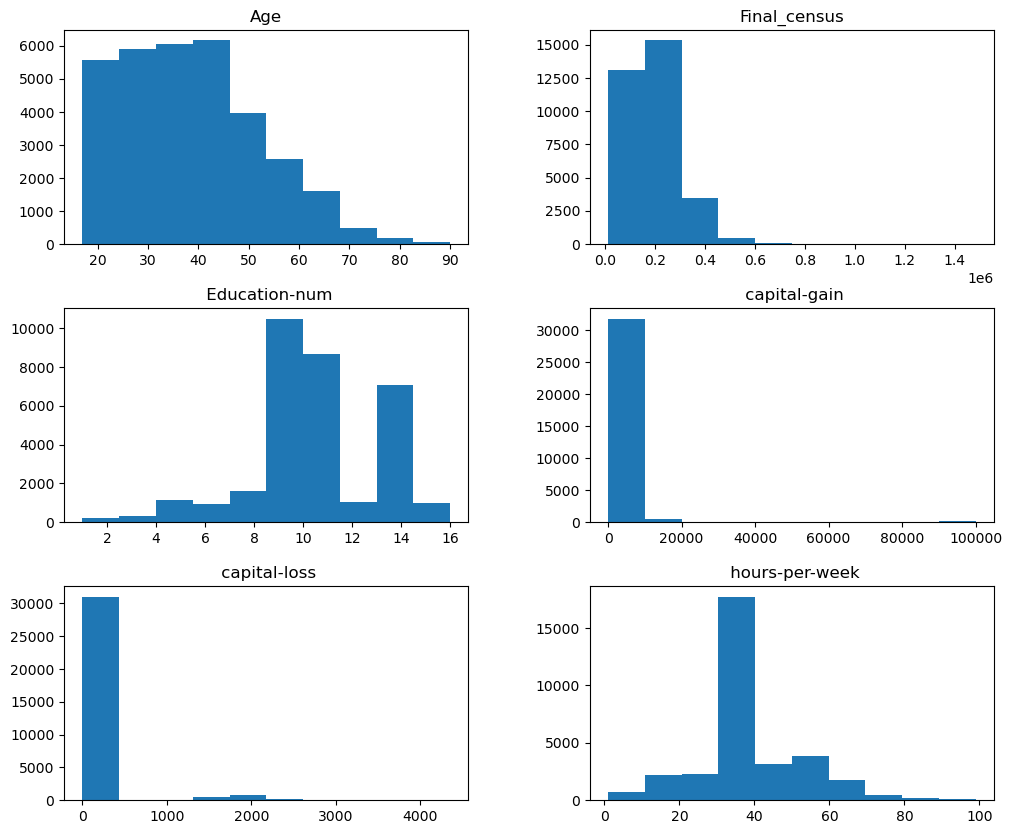

In [13]:
df.hist(figsize=(12,10),grid=False)

### Field analysis

In [14]:
for i in df.columns:
    if df[i].dtype!='int64':
        print("*"*15)
        print(i,"\n")
        print(df[i].value_counts())
        print('\n')

***************
Profession Class 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64


***************
 Education 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  Education, dtype: int64


***************
 marital-status 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse         

#### Handling unknown values

    We have unknown value / Null values which is indicated as "?" in the following columns 
    ['Profession Class', 'occupation', 'country']

In [15]:
# Find the percentage of unknown values in column 'Profession Class' , 'occupation', 'country'

Profession_Class = (len(df[df['Profession Class']==' ?'])/len(df))*100
Occupation = (len(df[df[' occupation']==' ?'])/len(df))*100
Country = (len(df[df[' country']==' ?'])/len(df))*100

Unknown_Values = pd.DataFrame()
Unknown_Values['Columns'] = ['Profession_Class','Occupation','Country']
Unknown_Values['Percentage of unknown'] = [Profession_Class,Occupation,Country]
Unknown_Values

,Columns,Percentage of unknown
0,Profession_Class,5.638647
1,Occupation,5.660146
2,Country,1.790486


In [16]:
# We can implicit the data using mode operation

In [17]:
cols = ['Profession Class',' occupation',' country']

for i in cols:
    df[i].replace(' ?',df[i].mode()[0],inplace=True)

In [18]:
# Verfiying the data once the unknown values are handled

for i in df.columns:
    if df[i].dtype!='int64':
        print("*"*15)
        print(i,"\n")
        print(df[i].value_counts())
        print('\n')

***************
Profession Class 

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64


***************
 Education 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  Education, dtype: int64


***************
 marital-status 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status,

### EDA

#### Age

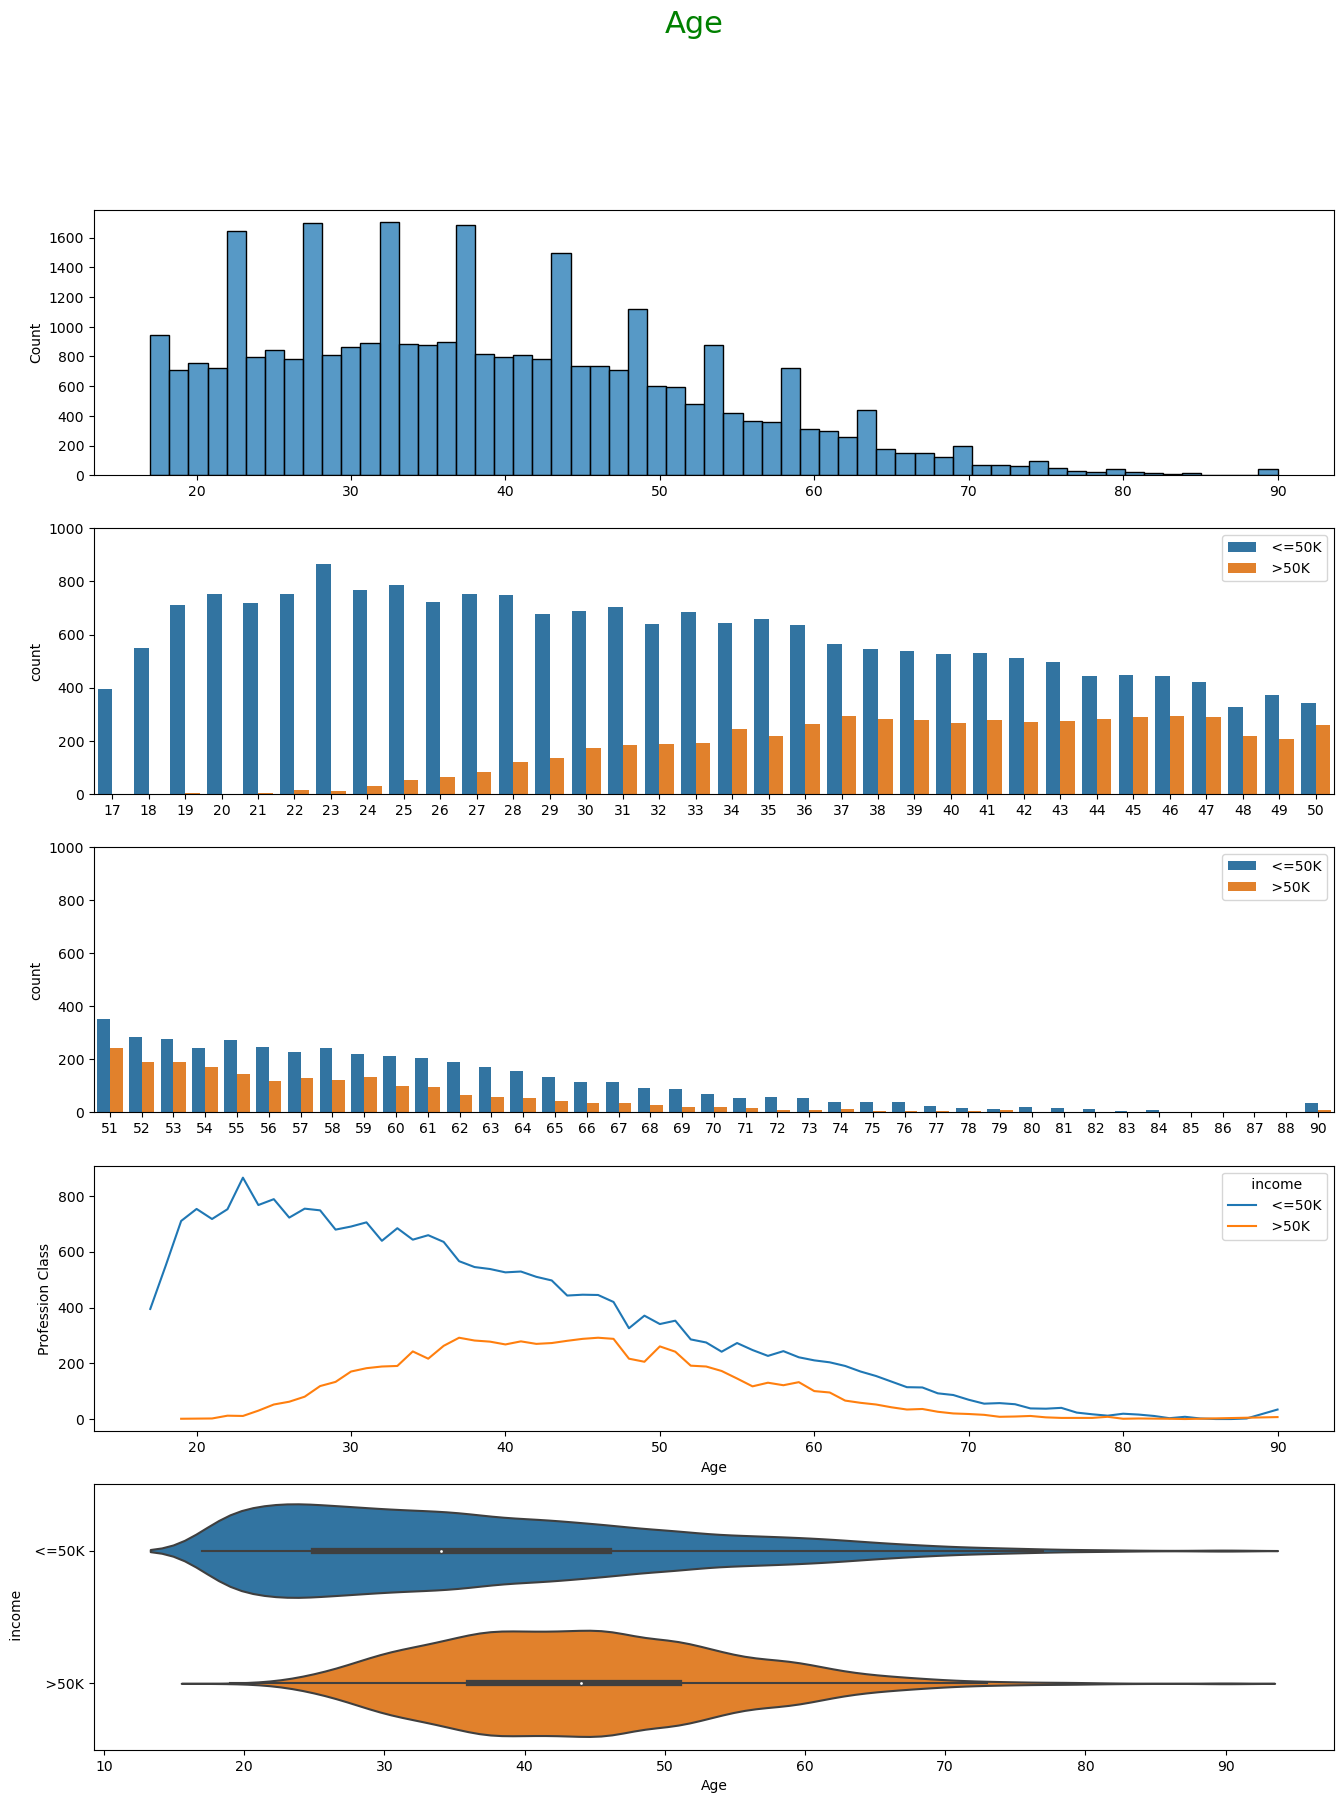

In [55]:
plt.subplots(5,1, figsize=(16, 20))

plt.subplot(5,1,1)
sns.histplot(df['Age'])
plt.xlabel(" ")


plt.subplot(5,1,2)
sns.countplot(x=df[df['Age']<=50]['Age'],hue=df[" income"] )
plt.legend(loc='upper right')
plt.ylim(0,1000)
plt.xlabel(" ")

plt.subplot(5,1,3)
sns.countplot(x=df[df['Age']>50]['Age'],hue=df[" income"] )
plt.legend(loc='upper right')
plt.ylim(0,1000)
plt.xlabel(" ")

plt.subplot(5,1,4)
data_viz = df.groupby(['Age',' income'], as_index=False)['Profession Class'].count()
sns.lineplot(data=data_viz, x='Age', y='Profession Class', hue=' income')

plt.subplot(5,1,5)
sns.violinplot(data=df, x="Age", y=" income")

plt.suptitle('Age',color ='g',size = 22 )

plt.show()

#### Profession Class

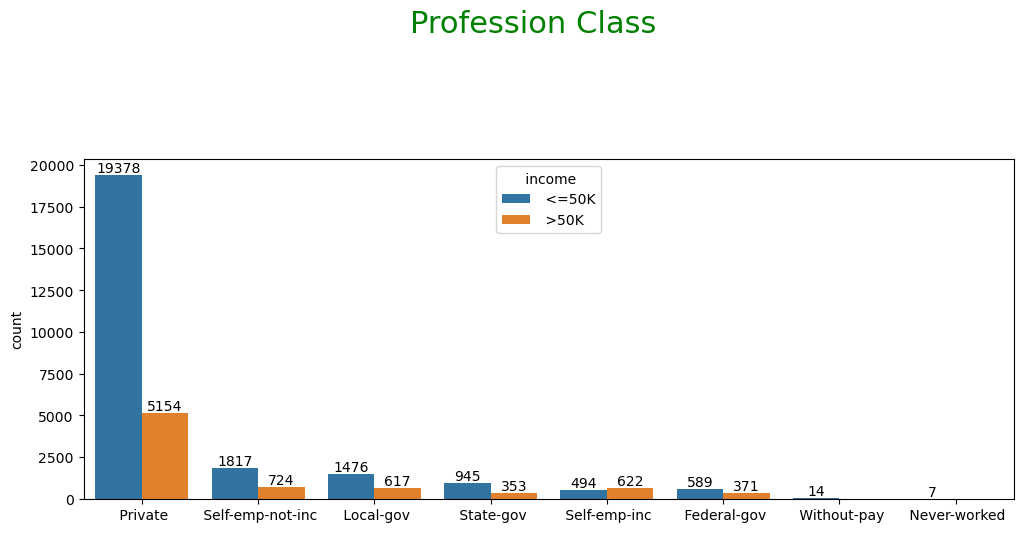

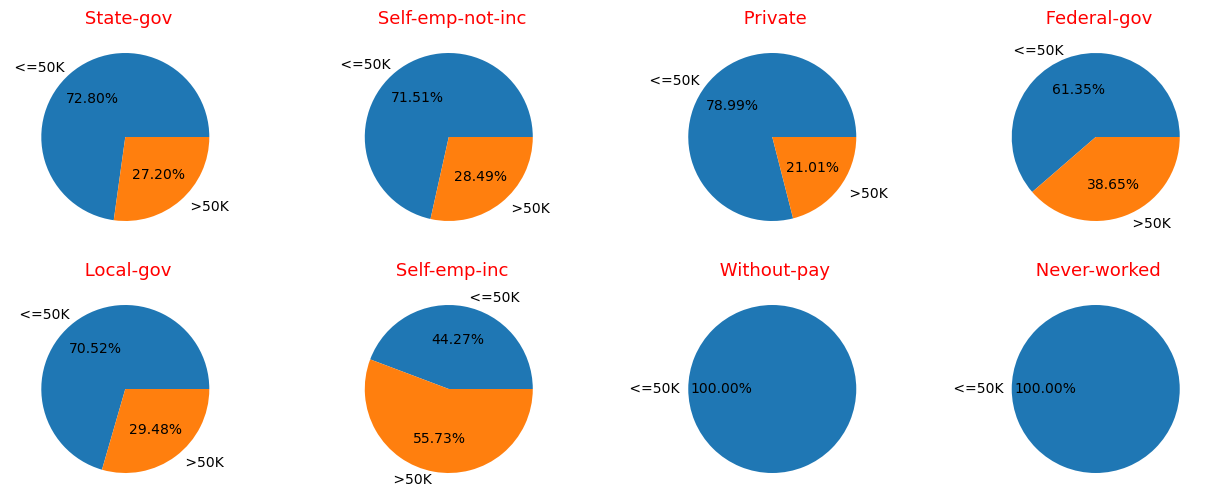

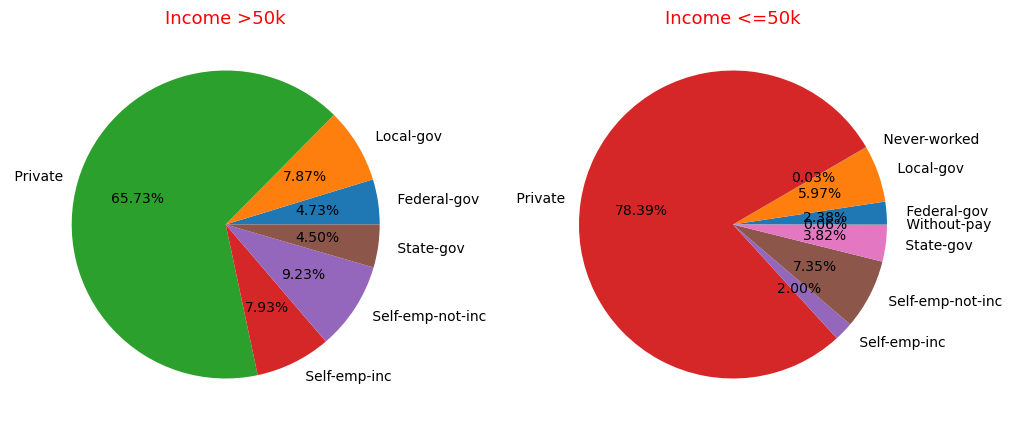

In [19]:
plt.subplots(1,1, figsize=(12, 15))

plt.subplot(3,1,1)
ax2 = sns.countplot(x=df['Profession Class'],hue=df[" income"] , order = df['Profession Class'].value_counts(ascending=False).index)
abs_values_1= df.loc[df[" income"]=="<=50",'Profession Class'].value_counts()
abs_values_2= df.loc[df[" income"]==">50",'Profession Class'].value_counts()
ax2.bar_label(container=ax2.containers[0], labels=abs_values_1)
ax2.bar_label(container=ax2.containers[1], labels=abs_values_2)
plt.xlabel(" ")

plt.suptitle('Profession Class',color ='g',size = 22 )


lst = [i for i in df['Profession Class'].unique()]
plot = 1

plt.subplots(2,4,figsize=(16,6))
for i in lst:
    df_1 = df[df["Profession Class"]==i]
    plt.subplot(2,4,plot)
    plot+=1
    plt.pie(x=df_1[" income"].value_counts().sort_index(),labels=df_1[" income"].value_counts().sort_index().index,autopct='%0.2f%%',data=df,colors=['C0','C1'])
    plt.title(i,color ='r',fontdict={'size': 13})

plt.show()


plt.subplots(1,2,figsize=(12,5))

df_2= df[df[' income']==' >50K']
plt.subplot(1,2,1)
plt.pie(x=df_2["Profession Class"].value_counts().sort_index(),labels=df_2["Profession Class"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income >50k",color ='r',fontdict={'size': 13})

df_3= df[df[' income']==' <=50K']
plt.subplot(1,2,2)
plt.pie(x=df_3["Profession Class"].value_counts().sort_index(),labels=df_3["Profession Class"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income <=50k",color ='r',fontdict={'size': 13})
             
plt.show()

#### Education Num

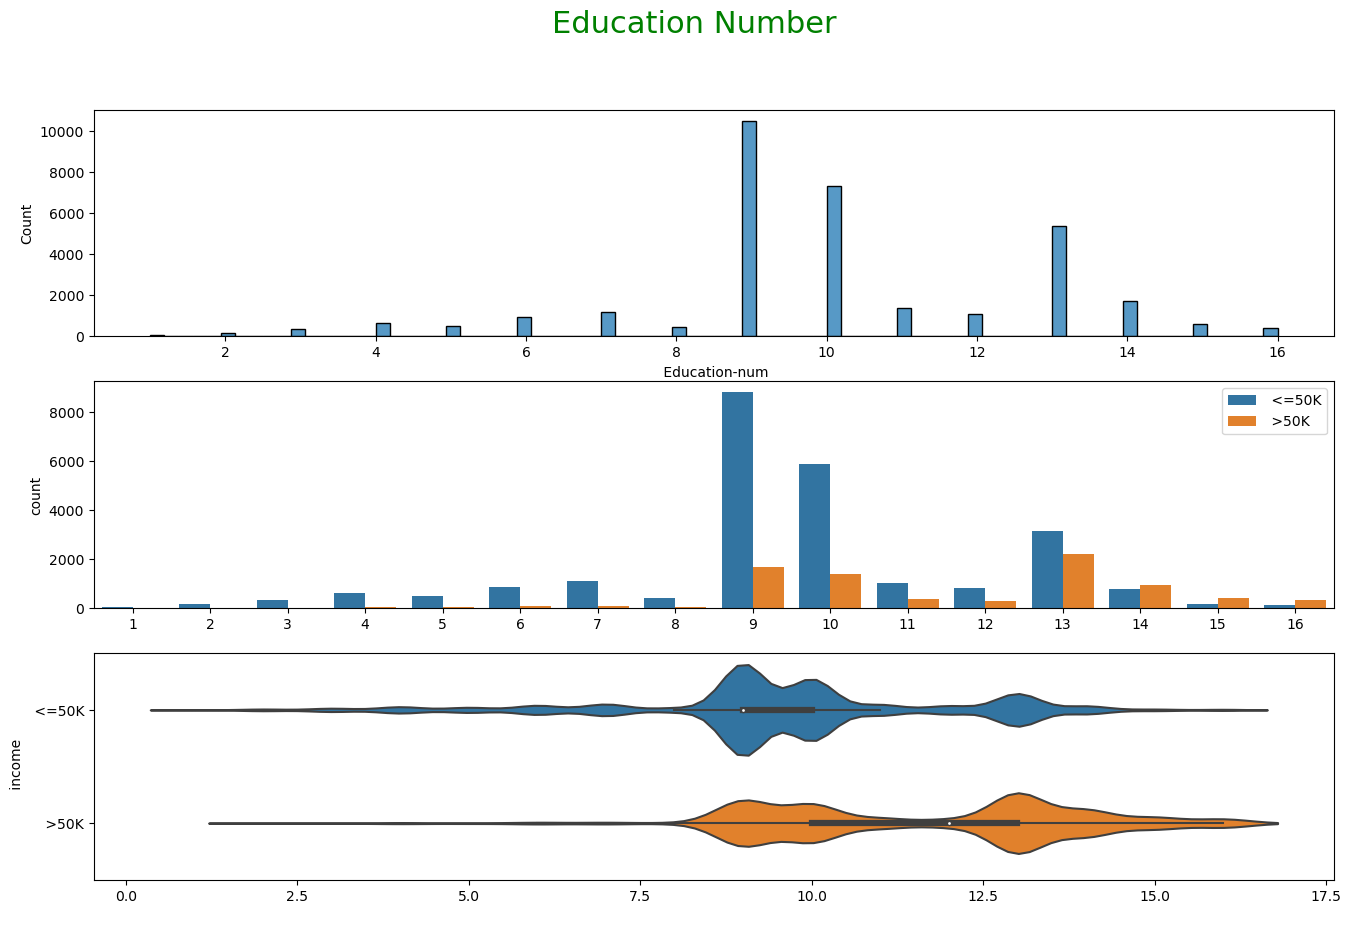

In [57]:
plt.subplots(3,1, figsize=(16, 10))

plt.subplot(3,1,1)
sns.histplot(df[' Education-num'])


plt.subplot(3,1,2)
sns.countplot(x=df[' Education-num'],hue=df[" income"] )
plt.legend(loc='upper right')
plt.xlabel(" ")

plt.subplot(3,1,3)
sns.violinplot(data=df, x=" Education-num", y=" income")
plt.xlabel(" ")


plt.suptitle('Education Number',color ='g',size = 22 )

plt.show()

#### Hours per week

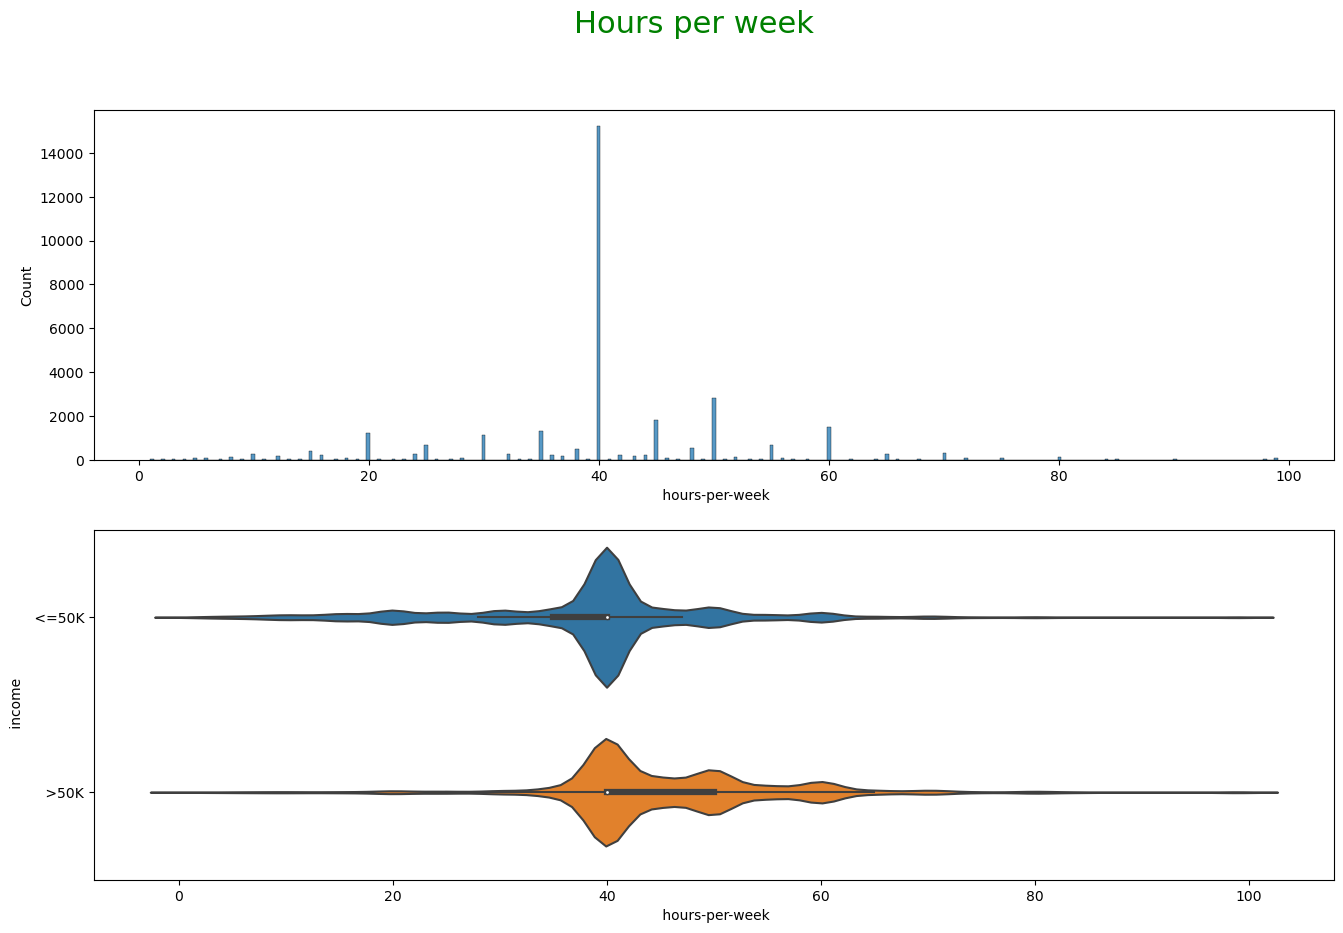

In [58]:
plt.subplots(2,1, figsize=(16, 10))

plt.subplot(2,1,1)
sns.histplot(df[' hours-per-week'])

plt.subplot(2,1,2)
sns.violinplot(data=df, x=" hours-per-week", y=" income")


plt.suptitle('Hours per week',color ='g',size = 22 )

plt.show()

#### Capital gain and loss

In [23]:
Capital_Gain_Loss = df[[' capital-gain',' capital-loss',' income']]
Capital_Gain_Loss["Capital_Gain"] = np.where(Capital_Gain_Loss[' capital-gain']>0,'Gain','Did not gain')
Capital_Gain_Loss["Capital_Loss"] = np.where(Capital_Gain_Loss[' capital-loss']>0,'Loss','Did not loss')

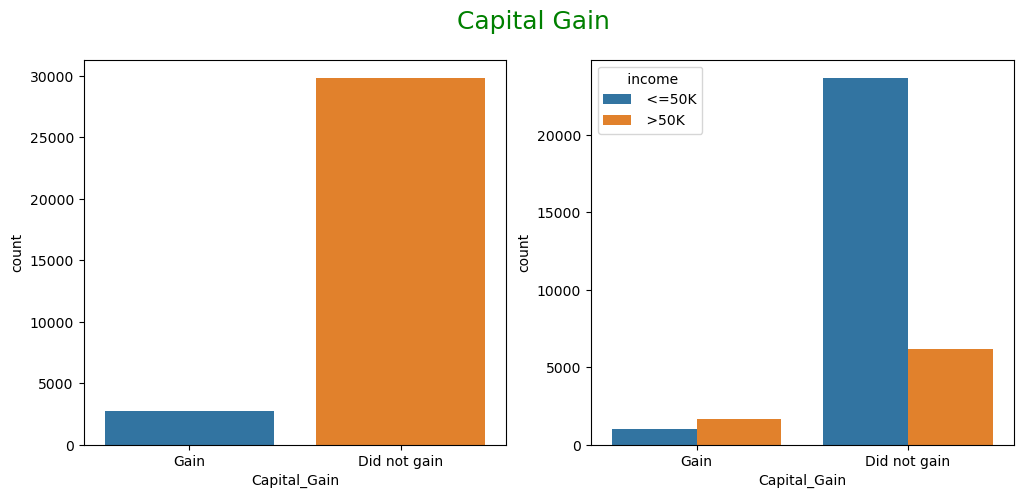

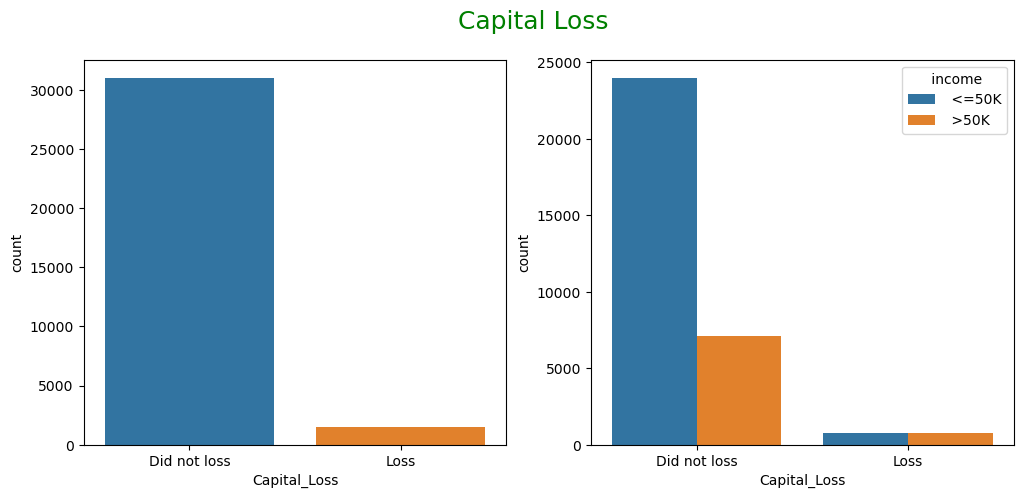

In [24]:
# Capital gain distribution

plt.subplots(1,2, figsize=(12, 5))

plt.subplot(1,2,1)
sns.countplot(Capital_Gain_Loss['Capital_Gain'])

plt.subplot(1,2,2)
sns.countplot(Capital_Gain_Loss['Capital_Gain'],hue=Capital_Gain_Loss[' income'])


plt.suptitle('Capital Gain',color ='g',size = 18 )
plt.show()

# Capital loss distribution

plt.subplots(1,2, figsize=(12, 5))

plt.subplot(1,2,1)
sns.countplot(Capital_Gain_Loss['Capital_Loss'])

plt.subplot(1,2,2)
sns.countplot(Capital_Gain_Loss['Capital_Loss'],hue=Capital_Gain_Loss[' income'])


plt.suptitle('Capital Loss',color ='g',size = 18 )
plt.show()

#### Gender

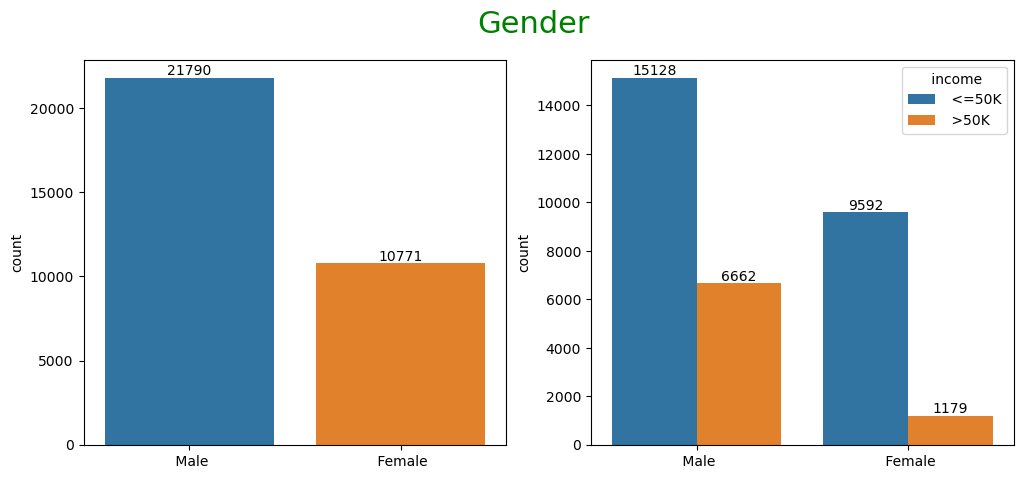

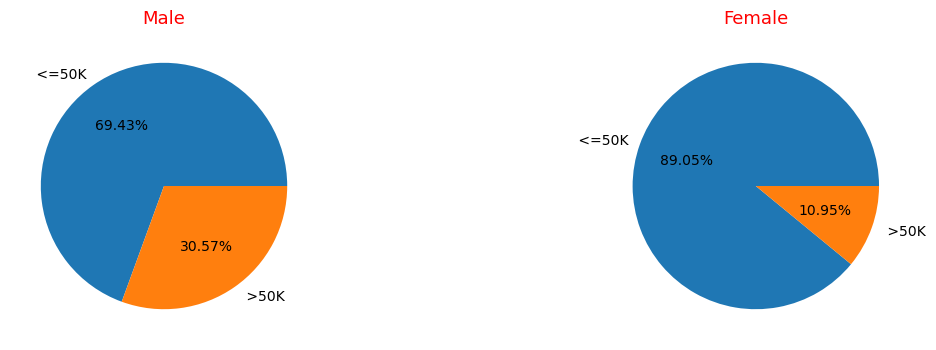

In [28]:
fig , axes= plt.subplots(1,2, figsize=(12, 5))

plt.subplot(1,2,1)
ax1 = sns.countplot(x=df['Gender'] , order = df["Gender"].value_counts(ascending=False).index)
abs_values = df['Gender'].value_counts()
ax1.bar_label(container=ax1.containers[0], labels=abs_values)
plt.xlabel(" ")

plt.subplot(1,2,2)
ax2 = sns.countplot(x=df['Gender'],hue=df[" income"] , order = df["Gender"].value_counts(ascending=False).index)
abs_values_1= df.loc[df[" income"]=="<=50",'Gender'].value_counts()
abs_values_2= df.loc[df[" income"]==">50",'Gender'].value_counts()
ax2.bar_label(container=ax2.containers[0], labels=abs_values_1)
ax2.bar_label(container=ax2.containers[1], labels=abs_values_2)
plt.xlabel(" ")

fig.suptitle('Gender',color ='g',size = 22 )

plt.subplots(1,2,figsize=(14,4))

df_1 = df[df["Gender"]==" Male"]
plt.subplot(1,2,1)
plt.pie(x=df_1[" income"].value_counts(),labels=df_1[" income"].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Male',color ='r',fontdict={'size': 13})

df_2 = df[df["Gender"]==" Female"]
plt.subplot(1,2,2)
plt.pie(x=df_2[" income"].value_counts(),labels=df_2[" income"].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Female',color ='r',fontdict={'size': 13})

plt.show()

#### Race

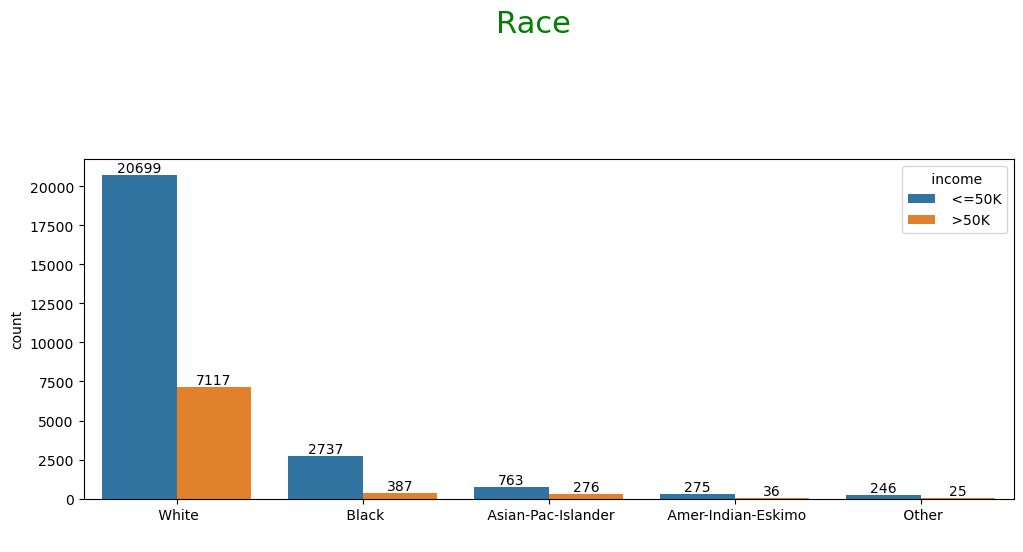

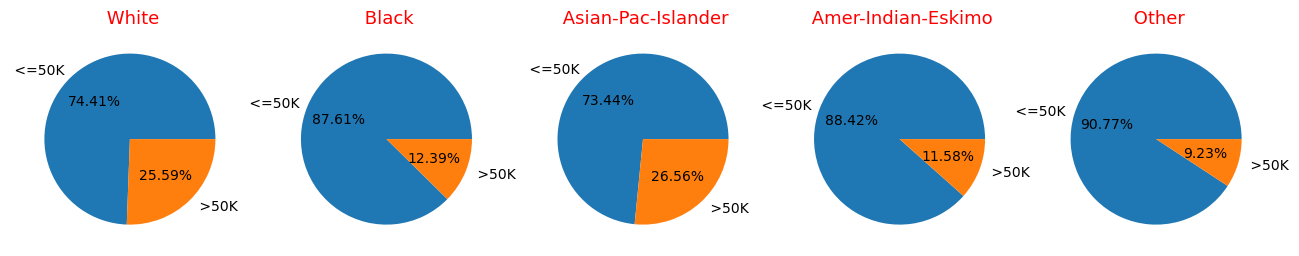

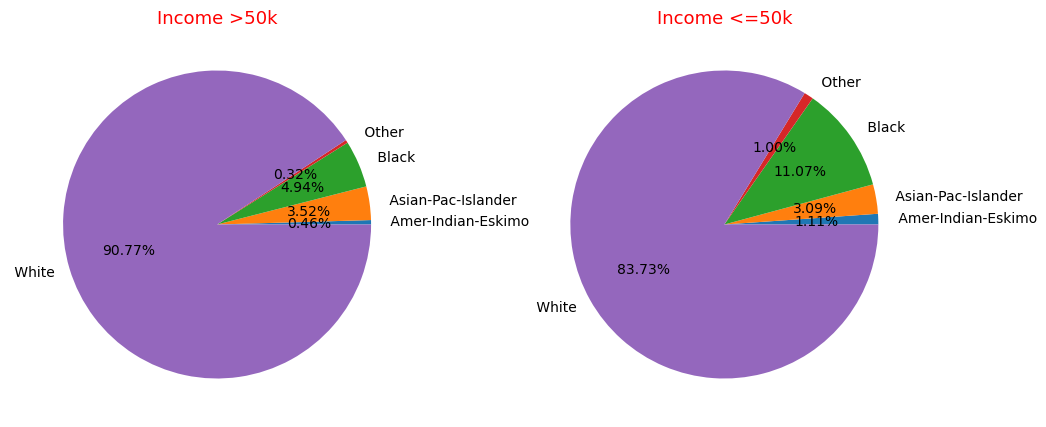

In [29]:
plt.subplots(1,1, figsize=(12, 15))

plt.subplot(3,1,1)
ax2 = sns.countplot(x=df[' race'],hue=df[" income"] , order = df[' race'].value_counts(ascending=False).index)
abs_values_1= df.loc[df[" income"]=="<=50",' race'].value_counts()
abs_values_2= df.loc[df[" income"]==">50",' race'].value_counts()
ax2.bar_label(container=ax2.containers[0], labels=abs_values_1)
ax2.bar_label(container=ax2.containers[1], labels=abs_values_2)
plt.xlabel(" ")

plt.suptitle('Race',color ='g',size = 22 )


lst = [i for i in df[' race'].unique()]
plot = 1

plt.subplots(1,5,figsize=(16,6))
for i in lst:
    df_1 = df[df[" race"]==i]
    plt.subplot(1,5,plot)
    plot+=1
    plt.pie(x=df_1[" income"].value_counts().sort_index(),labels=df_1[" income"].value_counts().sort_index().index,autopct='%0.2f%%',data=df,colors=['C0','C1'])
    plt.title(i,color ='r',fontdict={'size': 13})

plt.show()


plt.subplots(1,2,figsize=(12,5))

df_2= df[df[' income']==' >50K']
plt.subplot(1,2,1)
plt.pie(x=df_2[" race"].value_counts().sort_index(),labels=df_2[" race"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income >50k",color ='r',fontdict={'size': 13})

df_3= df[df[' income']==' <=50K']
plt.subplot(1,2,2)
plt.pie(x=df_3[" race"].value_counts().sort_index(),labels=df_3[" race"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income <=50k",color ='r',fontdict={'size': 13})
             
plt.show()

#### Marital status

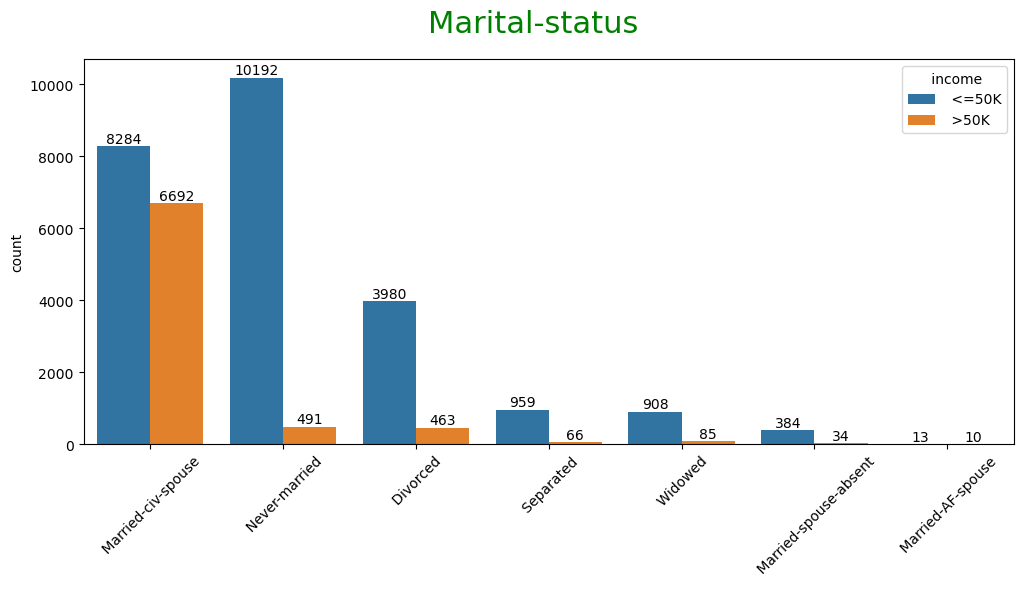

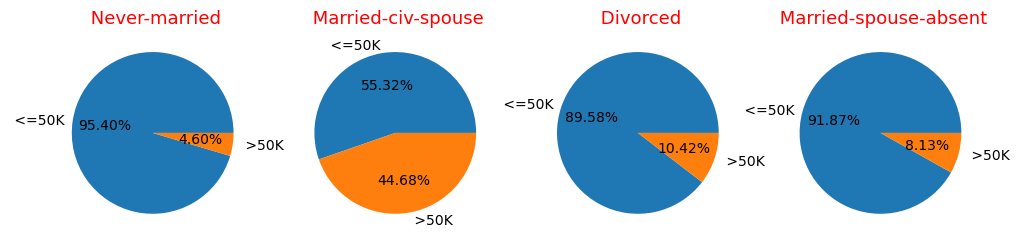

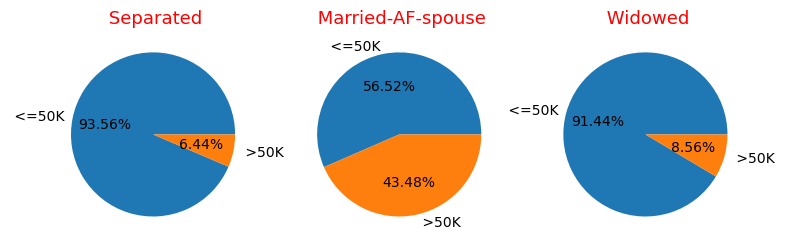

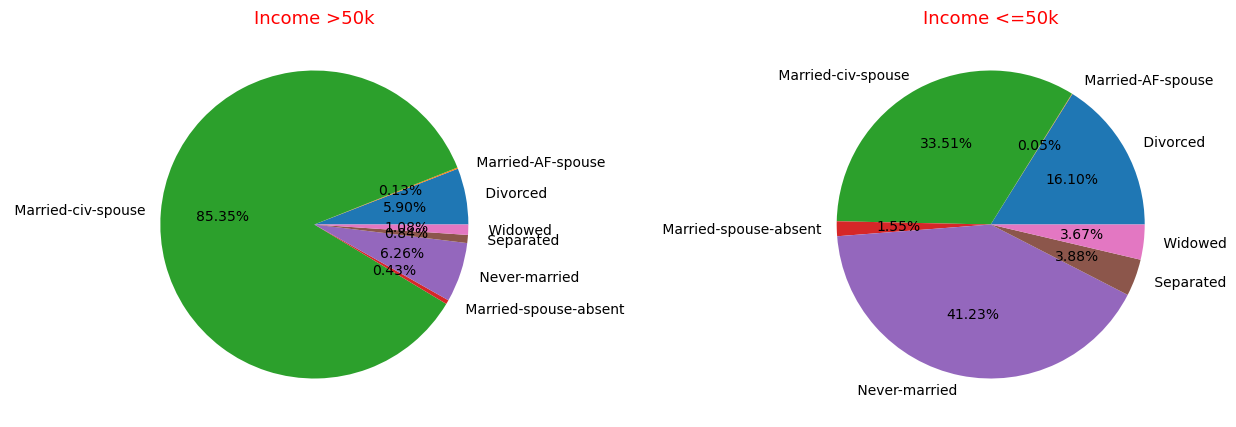

In [30]:
plt.subplots(1,1, figsize=(12, 5))

plt.subplot(1,1,1)
ax2 = sns.countplot(x=df[' marital-status'],hue=df[" income"] , order = df[' marital-status'].value_counts(ascending=False).index)
abs_values_1= df.loc[df[" income"]=="<=50",' marital-status'].value_counts()
abs_values_2= df.loc[df[" income"]==">50",' marital-status'].value_counts()
ax2.bar_label(container=ax2.containers[0], labels=abs_values_1)
ax2.bar_label(container=ax2.containers[1], labels=abs_values_2)
plt.xlabel(" ")
plt.xticks(rotation=45)

plt.suptitle('Marital-status',color ='g',size = 22 )


lst = [i for i in df[' marital-status'].unique()]
plot = 1

plt.subplots(1,4,figsize=(12,6))
for i in lst[:4]:
    df_1 = df[df[" marital-status"]==i]
    plt.subplot(1,4,plot)
    plot+=1
    plt.pie(x=df_1[" income"].value_counts().sort_index(),labels=df_1[" income"].value_counts().sort_index().index,autopct='%0.2f%%',data=df,colors=['C0','C1'])
    plt.title(i,color ='r',fontdict={'size': 13})

plt.show()

plot = 1
plt.subplots(1,3,figsize=(9,5))
for i in lst[4:]:
    df_1 = df[df[" marital-status"]==i]
    plt.subplot(1,3,plot)
    plot+=1
    plt.pie(x=df_1[" income"].value_counts().sort_index(),labels=df_1[" income"].value_counts().sort_index().index,autopct='%0.2f%%',data=df,colors=['C0','C1'])
    plt.title(i,color ='r',fontdict={'size': 13})

plt.show()


plt.subplots(1,2,figsize=(16,5))

df_2= df[df[' income']==' >50K']
plt.subplot(1,2,1)
plt.pie(x=df_2[" marital-status"].value_counts().sort_index(),labels=df_2[" marital-status"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income >50k",color ='r',fontdict={'size': 13})

df_3= df[df[' income']==' <=50K']
plt.subplot(1,2,2)
plt.pie(x=df_3[" marital-status"].value_counts().sort_index(),labels=df_3[" marital-status"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income <=50k",color ='r',fontdict={'size': 13})
             
plt.show()

#### Education

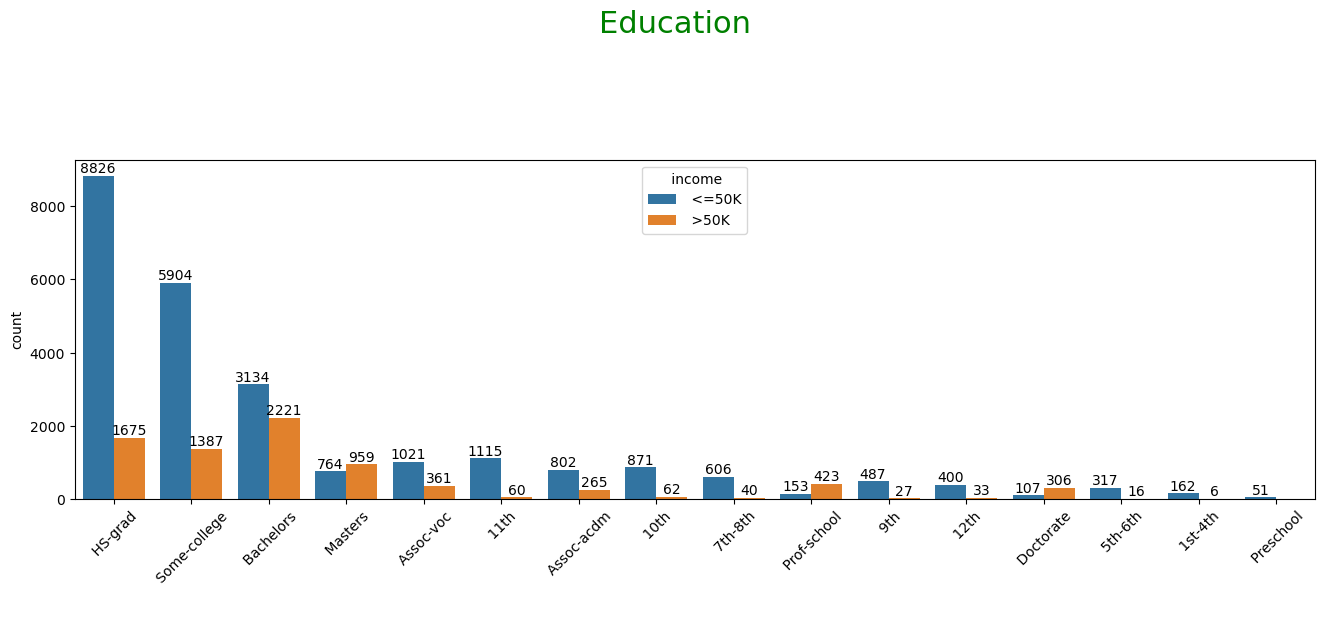

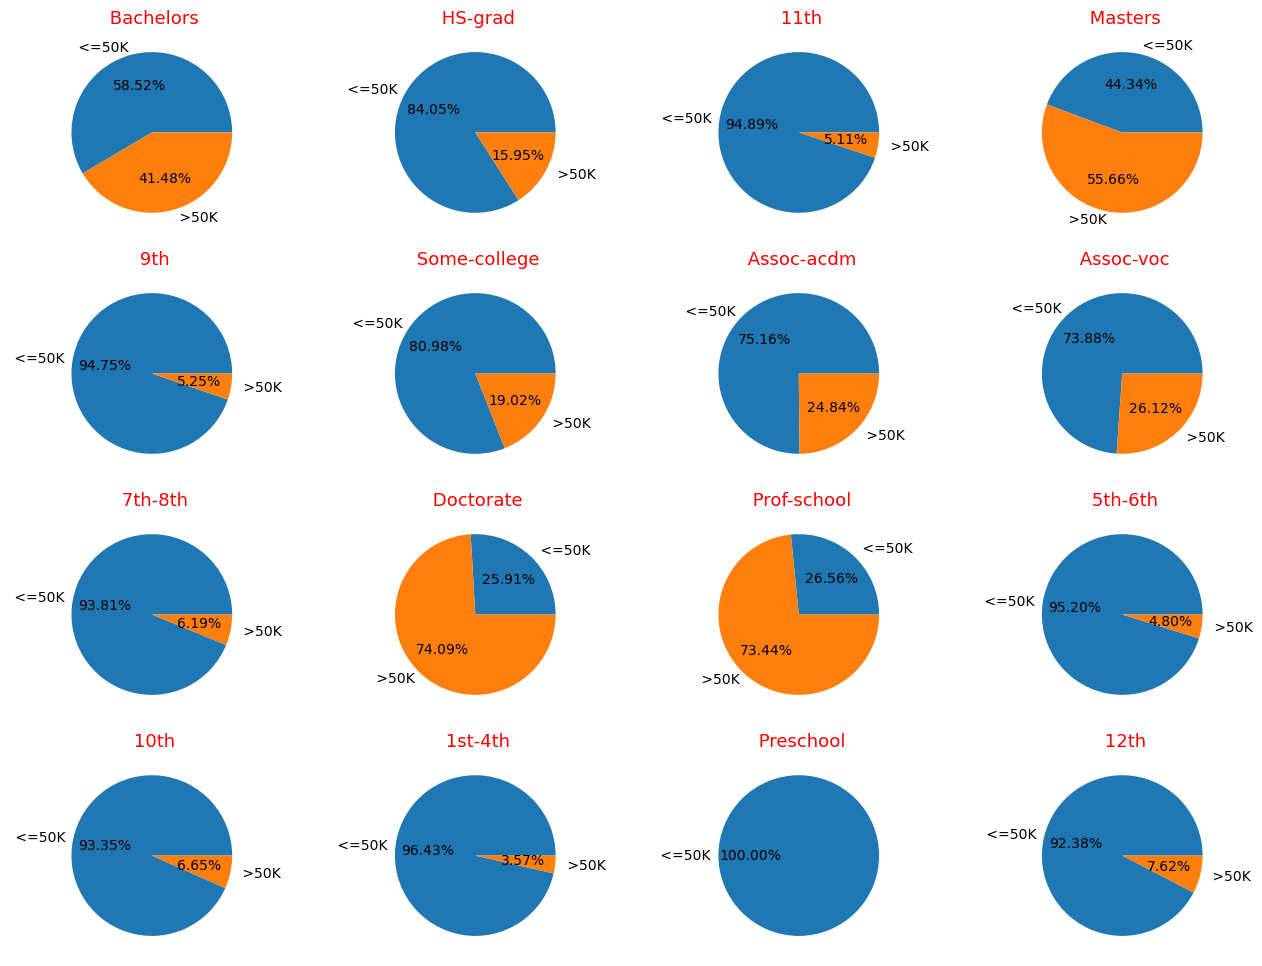

In [33]:
plt.subplots(1,1, figsize=(16, 15))

plt.subplot(3,1,1)
ax2 = sns.countplot(x=df[' Education'],hue=df[" income"] , order = df[' Education'].value_counts(ascending=False).index)
abs_values_1= df.loc[df[" income"]=="<=50",' Education'].value_counts()
abs_values_2= df.loc[df[" income"]==">50",' Education'].value_counts()
ax2.bar_label(container=ax2.containers[0], labels=abs_values_1)
ax2.bar_label(container=ax2.containers[1], labels=abs_values_2)
plt.xticks(rotation=45)
plt.xlabel(" ")

plt.suptitle('Education',color ='g',size = 22 )


lst = [i for i in df[' Education'].unique()]
plot = 1

plt.subplots(4,4,figsize=(16,12))
for i in lst:
    df_1 = df[df[" Education"]==i]
    plt.subplot(4,4,plot)
    plot+=1
    plt.pie(x=df_1[" income"].value_counts().sort_index(),labels=df_1[" income"].value_counts().sort_index().index,autopct='%0.2f%%',data=df,colors=['C0','C1'])
    plt.title(i,color ='r',fontdict={'size': 13})

plt.show()

#### Relationship

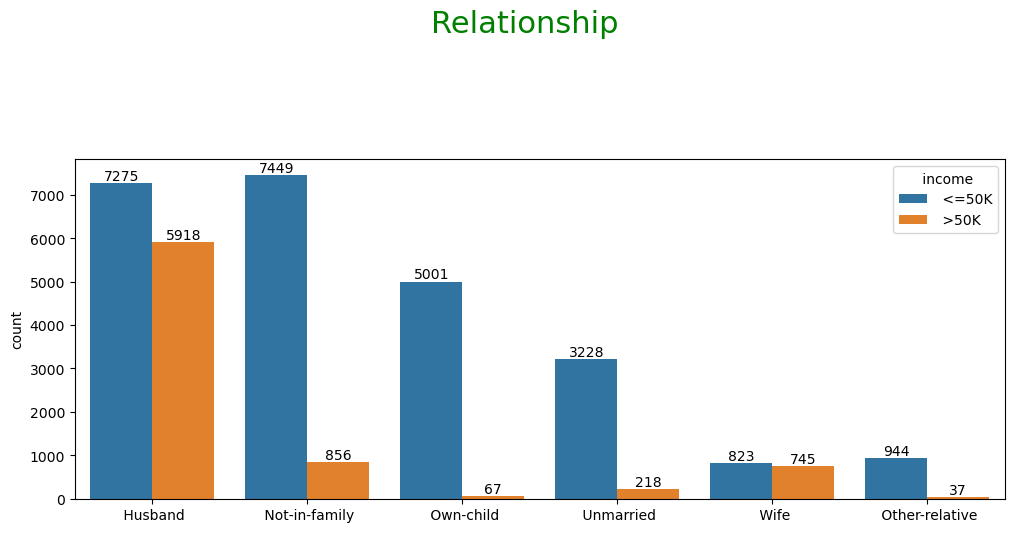

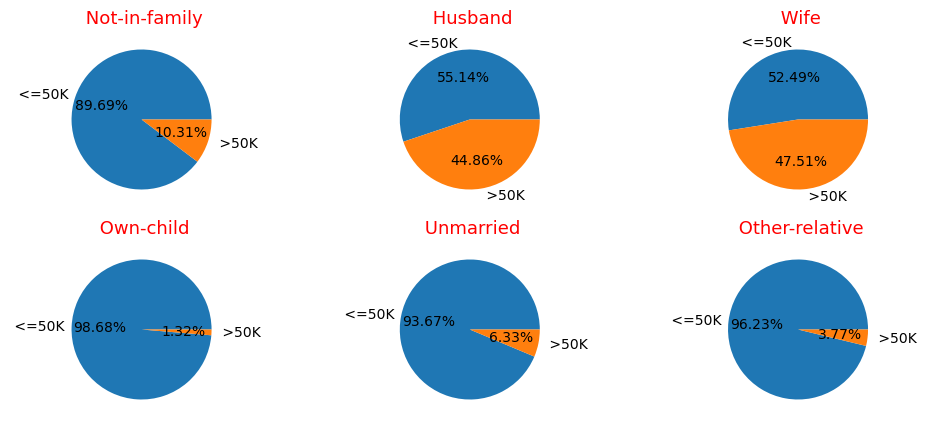

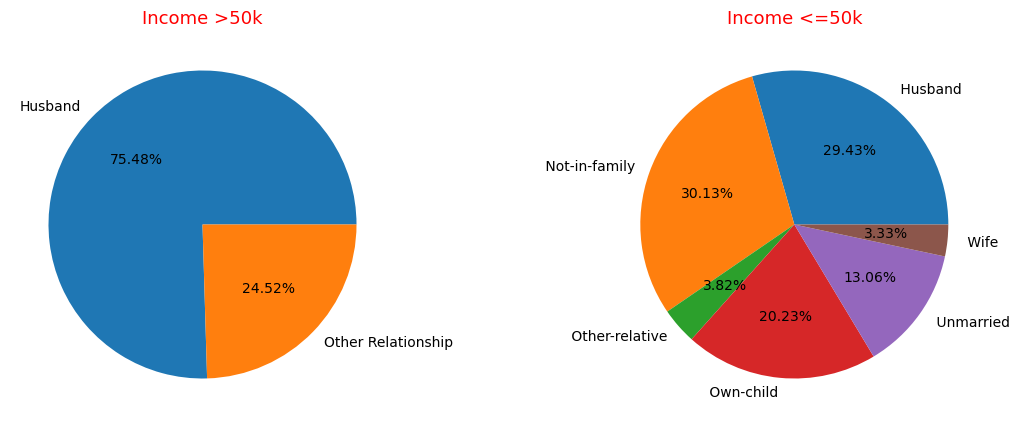

In [38]:
plt.subplots(1,1, figsize=(12, 15))

plt.subplot(3,1,1)
ax2 = sns.countplot(x=df[' relationship'],hue=df[" income"] , order = df[' relationship'].value_counts(ascending=False).index)
abs_values_1= df.loc[df[" income"]=="<=50",' relationship'].value_counts()
abs_values_2= df.loc[df[" income"]==">50",' relationship'].value_counts()
ax2.bar_label(container=ax2.containers[0], labels=abs_values_1)
ax2.bar_label(container=ax2.containers[1], labels=abs_values_2)
plt.xlabel(" ")

plt.suptitle('Relationship',color ='g',size = 22 )


lst = [i for i in df[' relationship'].unique()]
plot = 1

plt.subplots(2,3,figsize=(12,5))
for i in lst:
    df_1 = df[df[" relationship"]==i]
    plt.subplot(2,3,plot)
    plot+=1
    plt.pie(x=df_1[" income"].value_counts().sort_index(),labels=df_1[" income"].value_counts().sort_index().index,autopct='%0.2f%%',data=df,colors=['C0','C1'])
    plt.title(i,color ='r',fontdict={'size': 13})

plt.show()


plt.subplots(1,2,figsize=(14,5))

df_2= df[df[' income']==' >50K']
df_2[' relationship'] = np.where(df_2[' relationship']==' Husband','Husband','Other Relationship')
plt.subplot(1,2,1)
plt.pie(x=df_2[" relationship"].value_counts().sort_index(),labels=df_2[" relationship"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income >50k",color ='r',fontdict={'size': 13})

df_3= df[df[' income']==' <=50K']
plt.subplot(1,2,2)
plt.pie(x=df_3[" relationship"].value_counts().sort_index(),labels=df_3[" relationship"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income <=50k",color ='r',fontdict={'size': 13})
             
plt.show()

#### Occupation

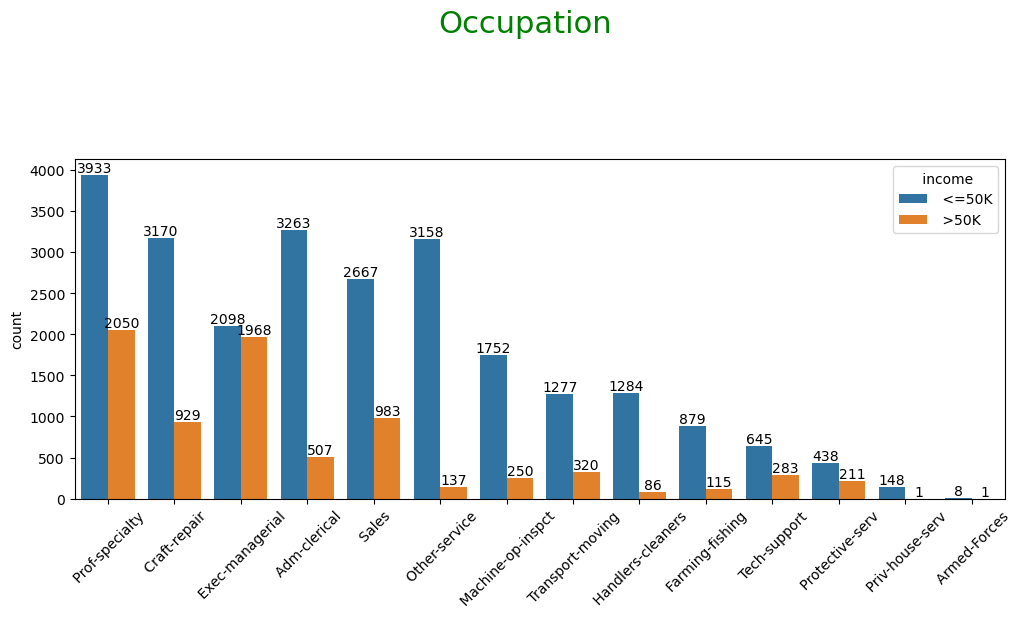

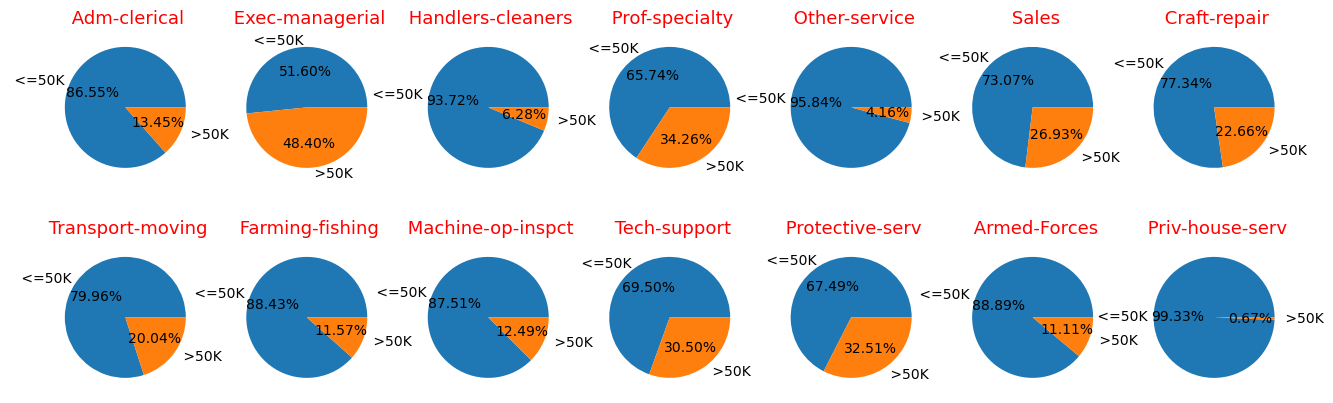

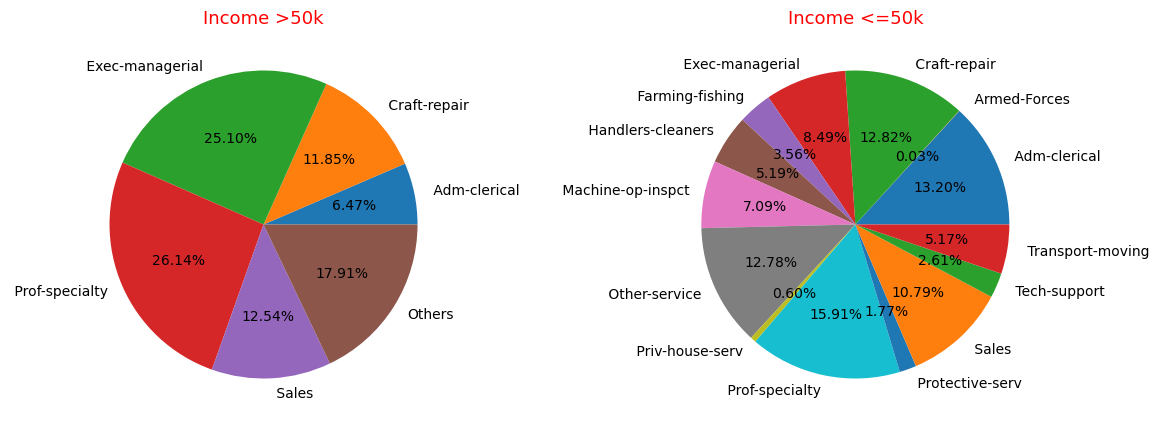

In [46]:
plt.subplots(1,1, figsize=(12, 15))

plt.subplot(3,1,1)
ax2 = sns.countplot(x=df[' occupation'],hue=df[" income"] , order = df[' occupation'].value_counts(ascending=False).index)
abs_values_1= df.loc[df[" income"]=="<=50",' occupation'].value_counts()
abs_values_2= df.loc[df[" income"]==">50",' occupation'].value_counts()
ax2.bar_label(container=ax2.containers[0], labels=abs_values_1)
ax2.bar_label(container=ax2.containers[1], labels=abs_values_2)
plt.xlabel(" ")
plt.xticks(rotation=45)

plt.suptitle('Occupation',color ='g',size = 22 )


lst = [i for i in df[' occupation'].unique()]
plot = 1

plt.subplots(2,7,figsize=(16,5))
for i in lst:
    df_1 = df[df[" occupation"]==i]
    plt.subplot(2,7,plot)
    plot+=1
    plt.pie(x=df_1[" income"].value_counts().sort_index(),labels=df_1[" income"].value_counts().sort_index().index,autopct='%0.2f%%',data=df,colors=['C0','C1'])
    plt.title(i,color ='r',fontdict={'size': 13})

plt.show()


plt.subplots(1,2,figsize=(14,5))

top_occ =  [' Prof-specialty',' Exec-managerial',' Sales',' Craft-repair',' Adm-clerical']

def replace_values(value):
    if value in top_occ:
        return value
    else:
        return 'Others'

df_2= df[df[' income']==' >50K']
df_2[' occupation'] = df[' occupation'].apply(replace_values)
plt.subplot(1,2,1)
plt.pie(x=df_2[" occupation"].value_counts().sort_index(),labels=df_2[" occupation"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income >50k",color ='r',fontdict={'size': 13})

df_3= df[df[' income']==' <=50K']
plt.subplot(1,2,2)
plt.pie(x=df_3[" occupation"].value_counts().sort_index(),labels=df_3[" occupation"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income <=50k",color ='r',fontdict={'size': 13})
             
plt.show()

#### Country

In [47]:
Country = df[[' country',' income']]
Country["Country_Group"] = np.where(Country[' country']==" United-States",'United-States','Others')

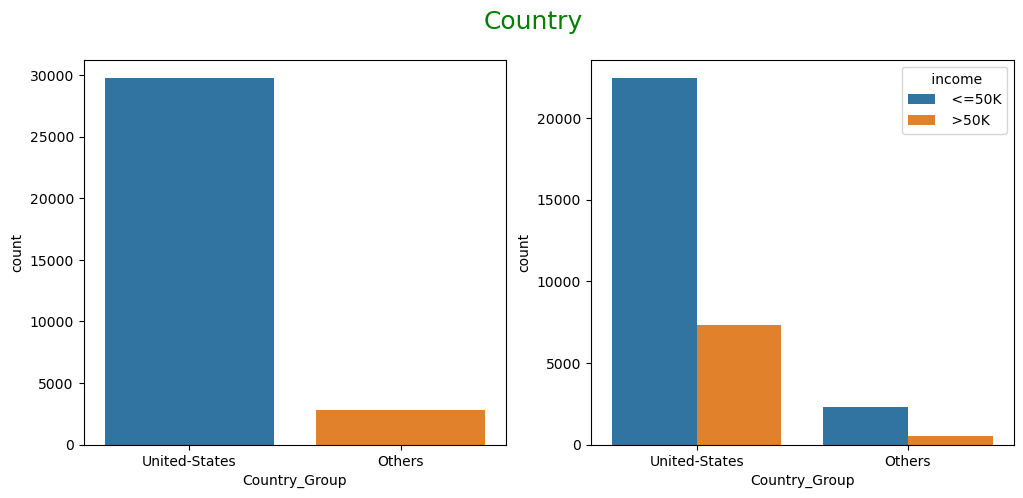

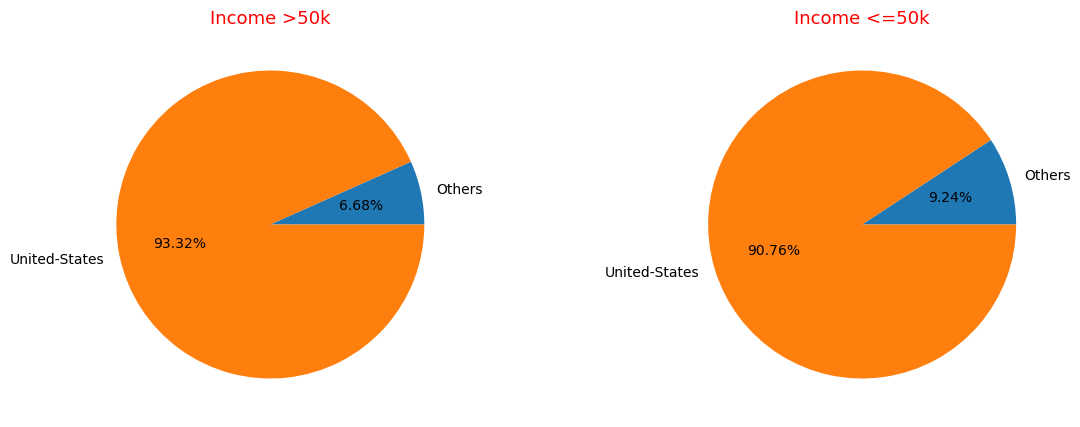

In [48]:
plt.subplots(1,2, figsize=(12, 5))

plt.subplot(1,2,1)
sns.countplot(Country['Country_Group'])

plt.subplot(1,2,2)
sns.countplot(Country['Country_Group'],hue=Capital_Gain_Loss[' income'])


plt.suptitle('Country',color ='g',size = 18 )
plt.show()

plt.subplots(1,2,figsize=(14,5))

df_2= Country[Country[' income']==' >50K']
plt.subplot(1,2,1)
plt.pie(x=df_2["Country_Group"].value_counts().sort_index(),labels=df_2["Country_Group"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income >50k",color ='r',fontdict={'size': 13})

df_3= Country[Country[' income']==' <=50K']
plt.subplot(1,2,2)
plt.pie(x=df_3["Country_Group"].value_counts().sort_index(),labels=df_3["Country_Group"].value_counts().sort_index().index,autopct='%0.2f%%',data=df)
plt.title("Income <=50k",color ='r',fontdict={'size': 13})
             
plt.show()

#### Final census

Text(0.5, 1.0, 'Final Census')

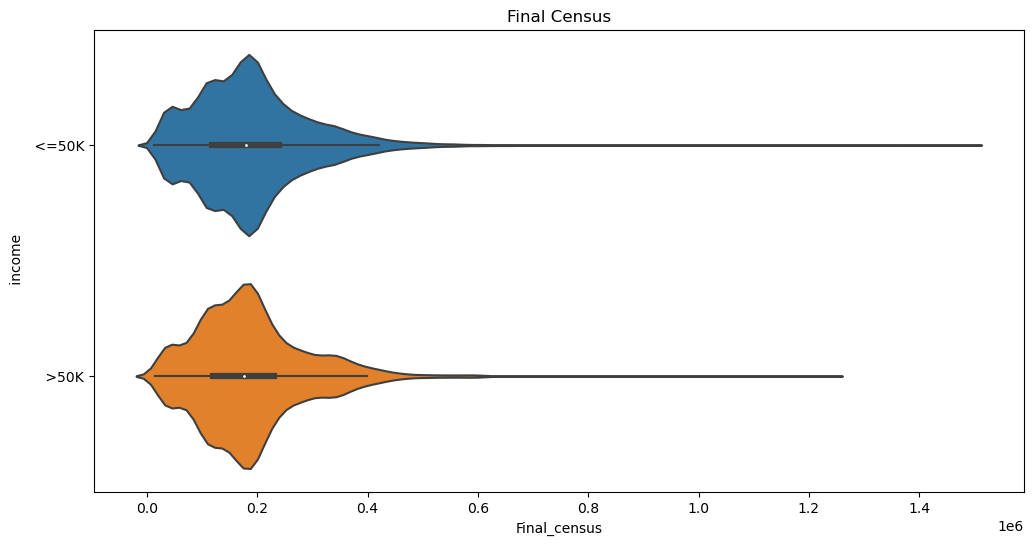

In [50]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x="Final_census", y=" income")
plt.title('Final Census')

### Insights from the EDA

__AGE__

From the above visuals it clearly shows that the age of 40-60 there is a considerable records where the income is above 50k. 
So if the age of the person is in that range there is high probability to earn above 50k.

__EDUCATION NUM__

If the total number of years spends on education is less than 13 most of the records shows they earn less than 50K. So the person with 13 or more years or education has high chance to earn above 50K.
Because of the huge volume at 9 and 10 years we can see an increase in violin chart but the distribution is comparatively low.

__Hours per week__

Those who work more than 40 hours are in the category with income greater than 50k.

__Capital Gain__

Even though the ratio of capital gain records is much lower, closer examination reveals that over 50% of the records with capital gains are making more than 50,000 annually.

__Gender__

According to the gender feature, males have a 20 percent more likelihood than females of generating an income beyond $50,000. 

__Marital Status__

The marital status provides insight into the likelihood that an individual who is married and residing with their spouse will make over $50,000 annually.

__Education__

The likelihood of earning more than $50,000 is higher for these four educational qualifications.

Over 75% of professionals with a Prof-School and a Doctorate make more than $50,000. But their percentage to the total dataset is lower than others demonstrates how their rarity increases their value.

__Relationship__

Out of 100% records in our dataset 75% of them are husbands who are earning above 50K.

__Occupation__

These five professions, which make up 80% of the dataset, are depicted in the graph and earn more than $50,000 annually.

After more investigation, we can say that Prof-Speciality and Executive Manager have higher distributions to earn above 50K.


# Model

In [43]:
data = df.copy()

### Outlier treatment

In [44]:
# Numeric Columns

cols = [i for i in data.columns if data[i].dtype!='O']
print(cols)

['Age', 'Final_census', ' Education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


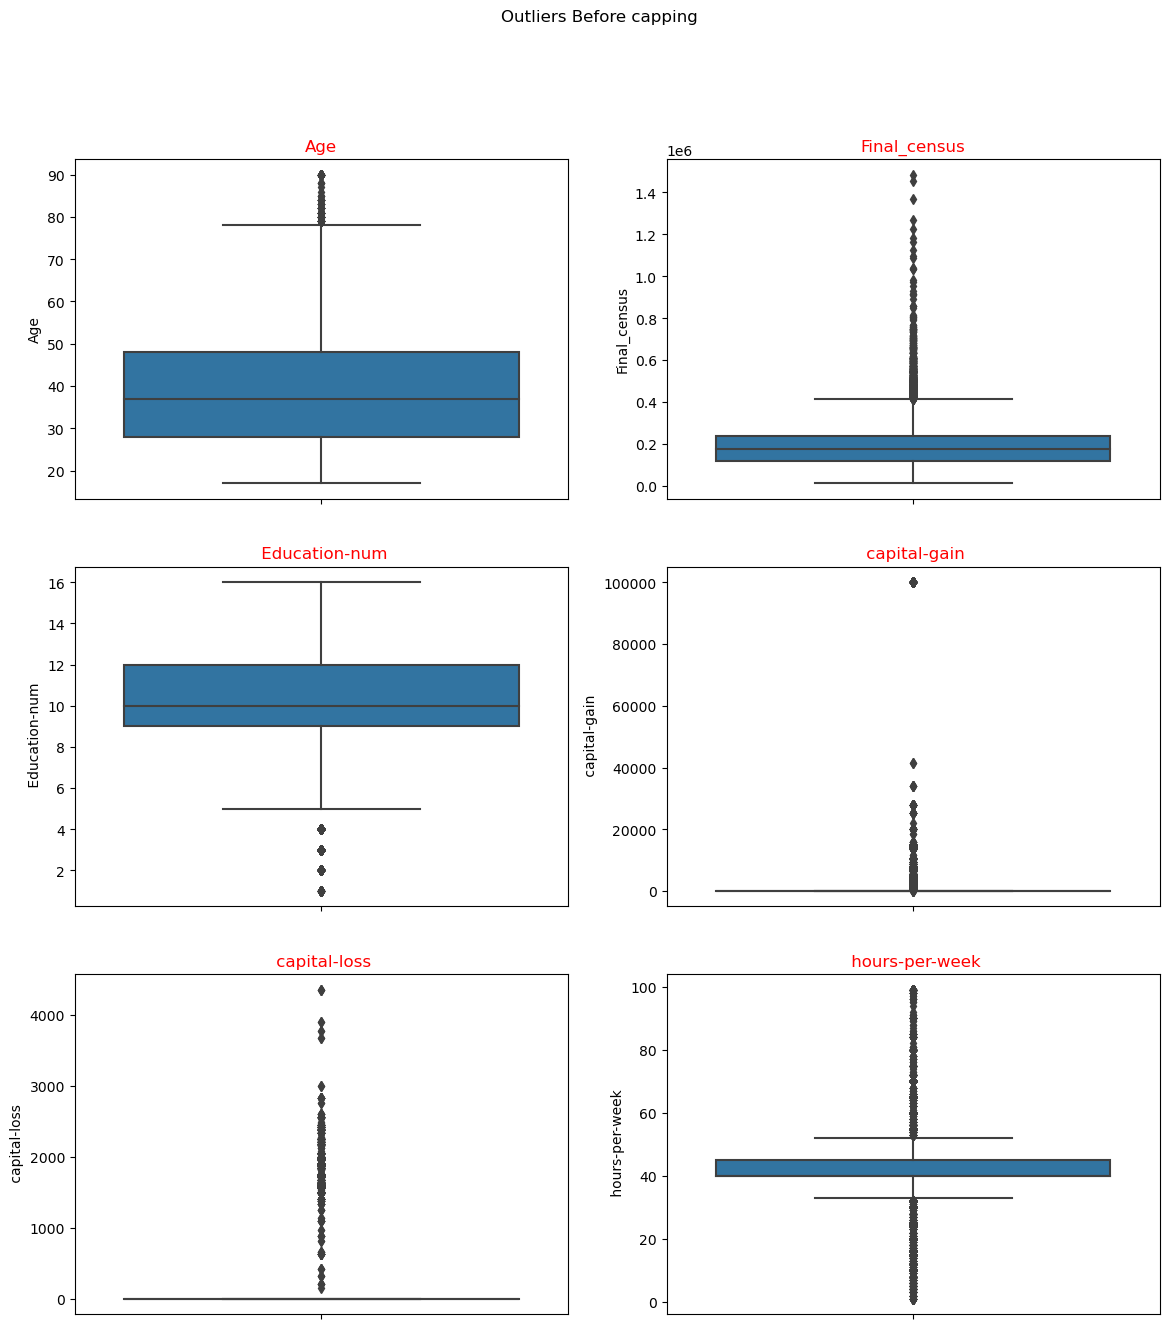

In [45]:
# Visualising the outlier in the dataset

plt.subplots(3,2,figsize=(14,15))

for i,j in enumerate(cols):
    plt.subplot(3,2,i+1)
    sns.boxplot( y = data[j])
    plt.title(j,color = 'r')
    
plt.suptitle('Outliers Before capping')
plt.show()

In [46]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
Upper_fence = (Q3+(1.5*IQR))
Lower_fence = (Q1-(1.5*IQR))
print("Upper fence : \n\n",Upper_fence)
print("Lower fence : \n\n",Lower_fence)

Upper fence : 

 Age                    78.0
Final_census       415887.0
 Education-num         16.5
 capital-gain           0.0
 capital-loss           0.0
 hours-per-week        52.5
dtype: float64
Lower fence : 

 Age                   -2.0
Final_census      -61009.0
 Education-num         4.5
 capital-gain          0.0
 capital-loss          0.0
 hours-per-week       32.5
dtype: float64


In [47]:
print("Non Zero values in Capital loss", len(data[data[' capital-loss']!=0]))
print("Non Zero values in Capital gain", len(data[data[' capital-gain']!=0]))

Non Zero values in Capital loss 1519
Non Zero values in Capital gain 2712


If the outlier are handled in the following features it totally becomes zero and doesnt make any value in our dataset. However during EDA we found some insights from the capital gain field. So it is better to leave that column without handling the outlier.

However even if outlier is handled in other columns most of the values remains the same except the hours of week even in that condition the insights we got and the uppper and lower limit are the same.

In [48]:
data["Age"]=np.where(data["Age"]>78.0,78.0,np.where(data["Age"]<-2.0,-2.0,data["Age"]))

data["Final_census"]=np.where(data["Final_census"]>415887.0,415887.0,data["Final_census"])

data[" Education-num"]=np.where(data[" Education-num"]>16.5,16.5,
                                np.where(data[" Education-num"]<4.5,4.5,
                                         data[" Education-num"]))
data[" hours-per-week"]=np.where(data[" hours-per-week"]>52.5,,52.5
                                 np.where(data[" hours-per-week"]<32.5,32.5,
                                          data[" hours-per-week"]))

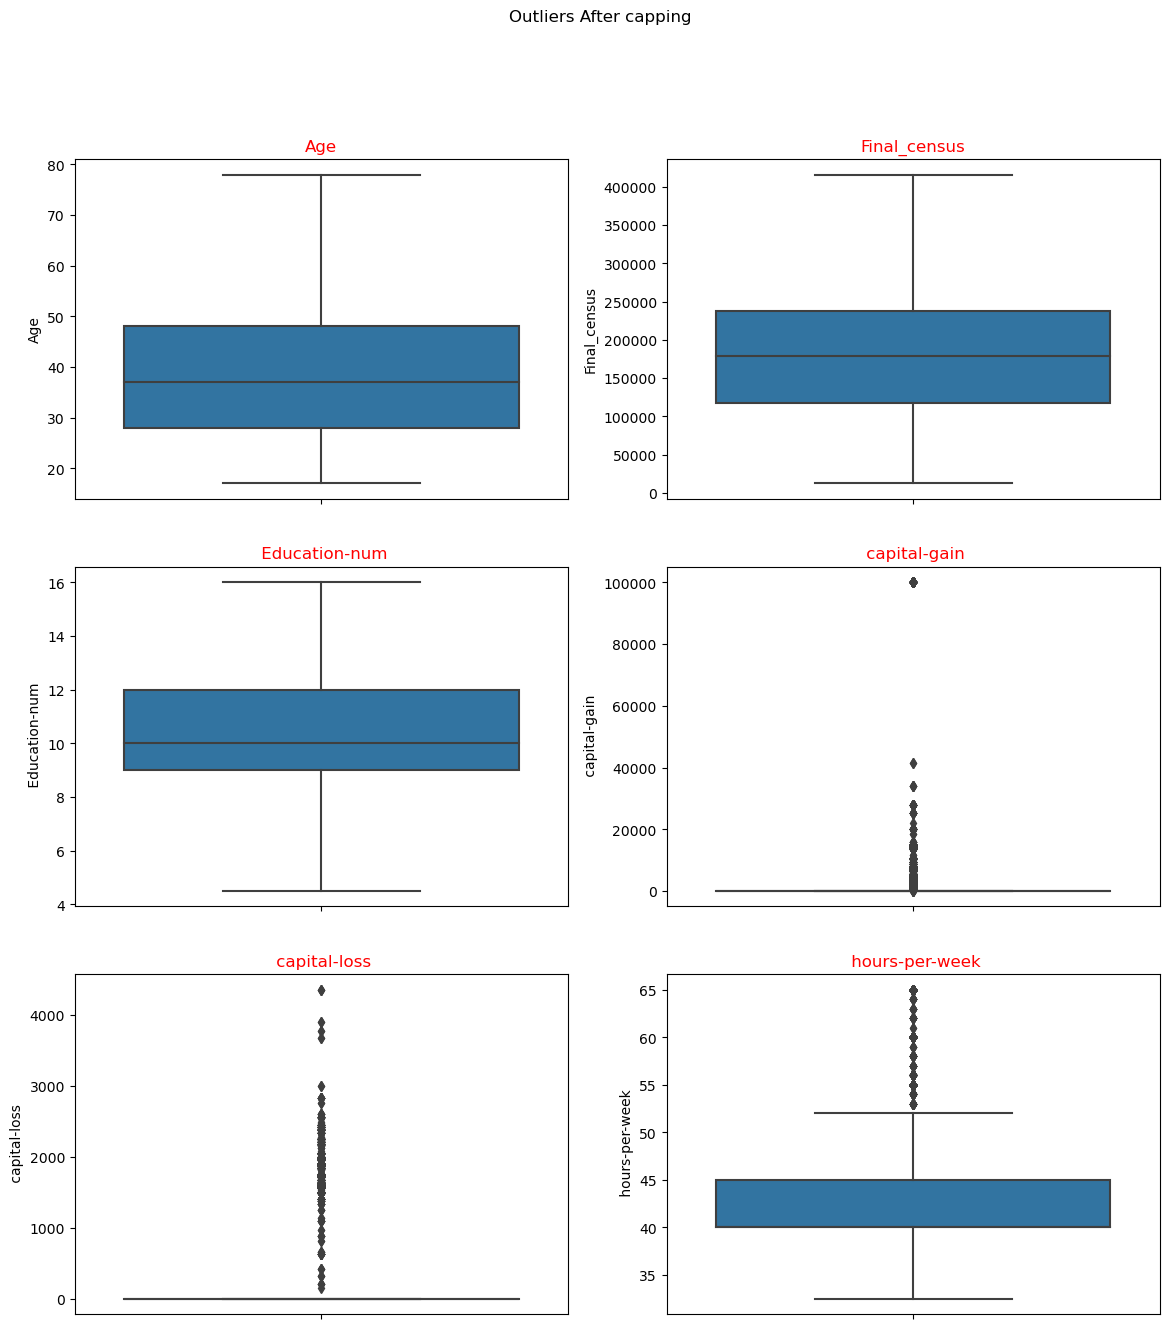

In [49]:
# Visualising the outlier after the capping

plt.subplots(3,2,figsize=(14,15))

for i,j in enumerate(cols):
    plt.subplot(3,2,i+1)
    sns.boxplot( y = data[j])
    plt.title(j,color = 'r')

plt.suptitle('Outliers After capping')
plt.show()

### Label Encoding

In [50]:
cols = [i for i in data.columns if data[i].dtype=='O' and i!=' income']

data=pd.get_dummies(data,columns=cols,drop_first=True)

In [51]:
data[' income'] = data[' income'].map({' <=50K':0,' >50K':1})

In [52]:
data.head()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,income,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,Profession Class_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,Gender_ Male,country_ Canada,country_ China,country_ Columbia,country_ Cuba,country_ Dominican-Republic,country_ Ecuador,country_ El-Salvador,country_ England,country_ France,country_ Germany,country_ Greece,country_ Guatemala,country_ Haiti,country_ Holand-Netherlands,country_ Honduras,country_ Hong,country_ Hungary,country_ India,country_ Iran,country_ Ireland,country_ Italy,country_ Jamaica,country_ Japan,country_ Laos,country_ Mexico,country_ Nicaragua,country_ Outlying-US(Guam-USVI-etc),country_ Peru,country_ Philippines,country_ Poland,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39.0,77516.0,13.0,2174,0,40.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,13.0,0,0,32.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,9.0,0,0,40.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53.0,234721.0,7.0,0,0,40.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28.0,338409.0,13.0,0,0,40.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Checking for Multi-Collinearity

In [53]:
data_1 = data.copy()

In [54]:
# Creation of upper triangle
corr_mat = data_1.corr()
upper_mat=corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool))

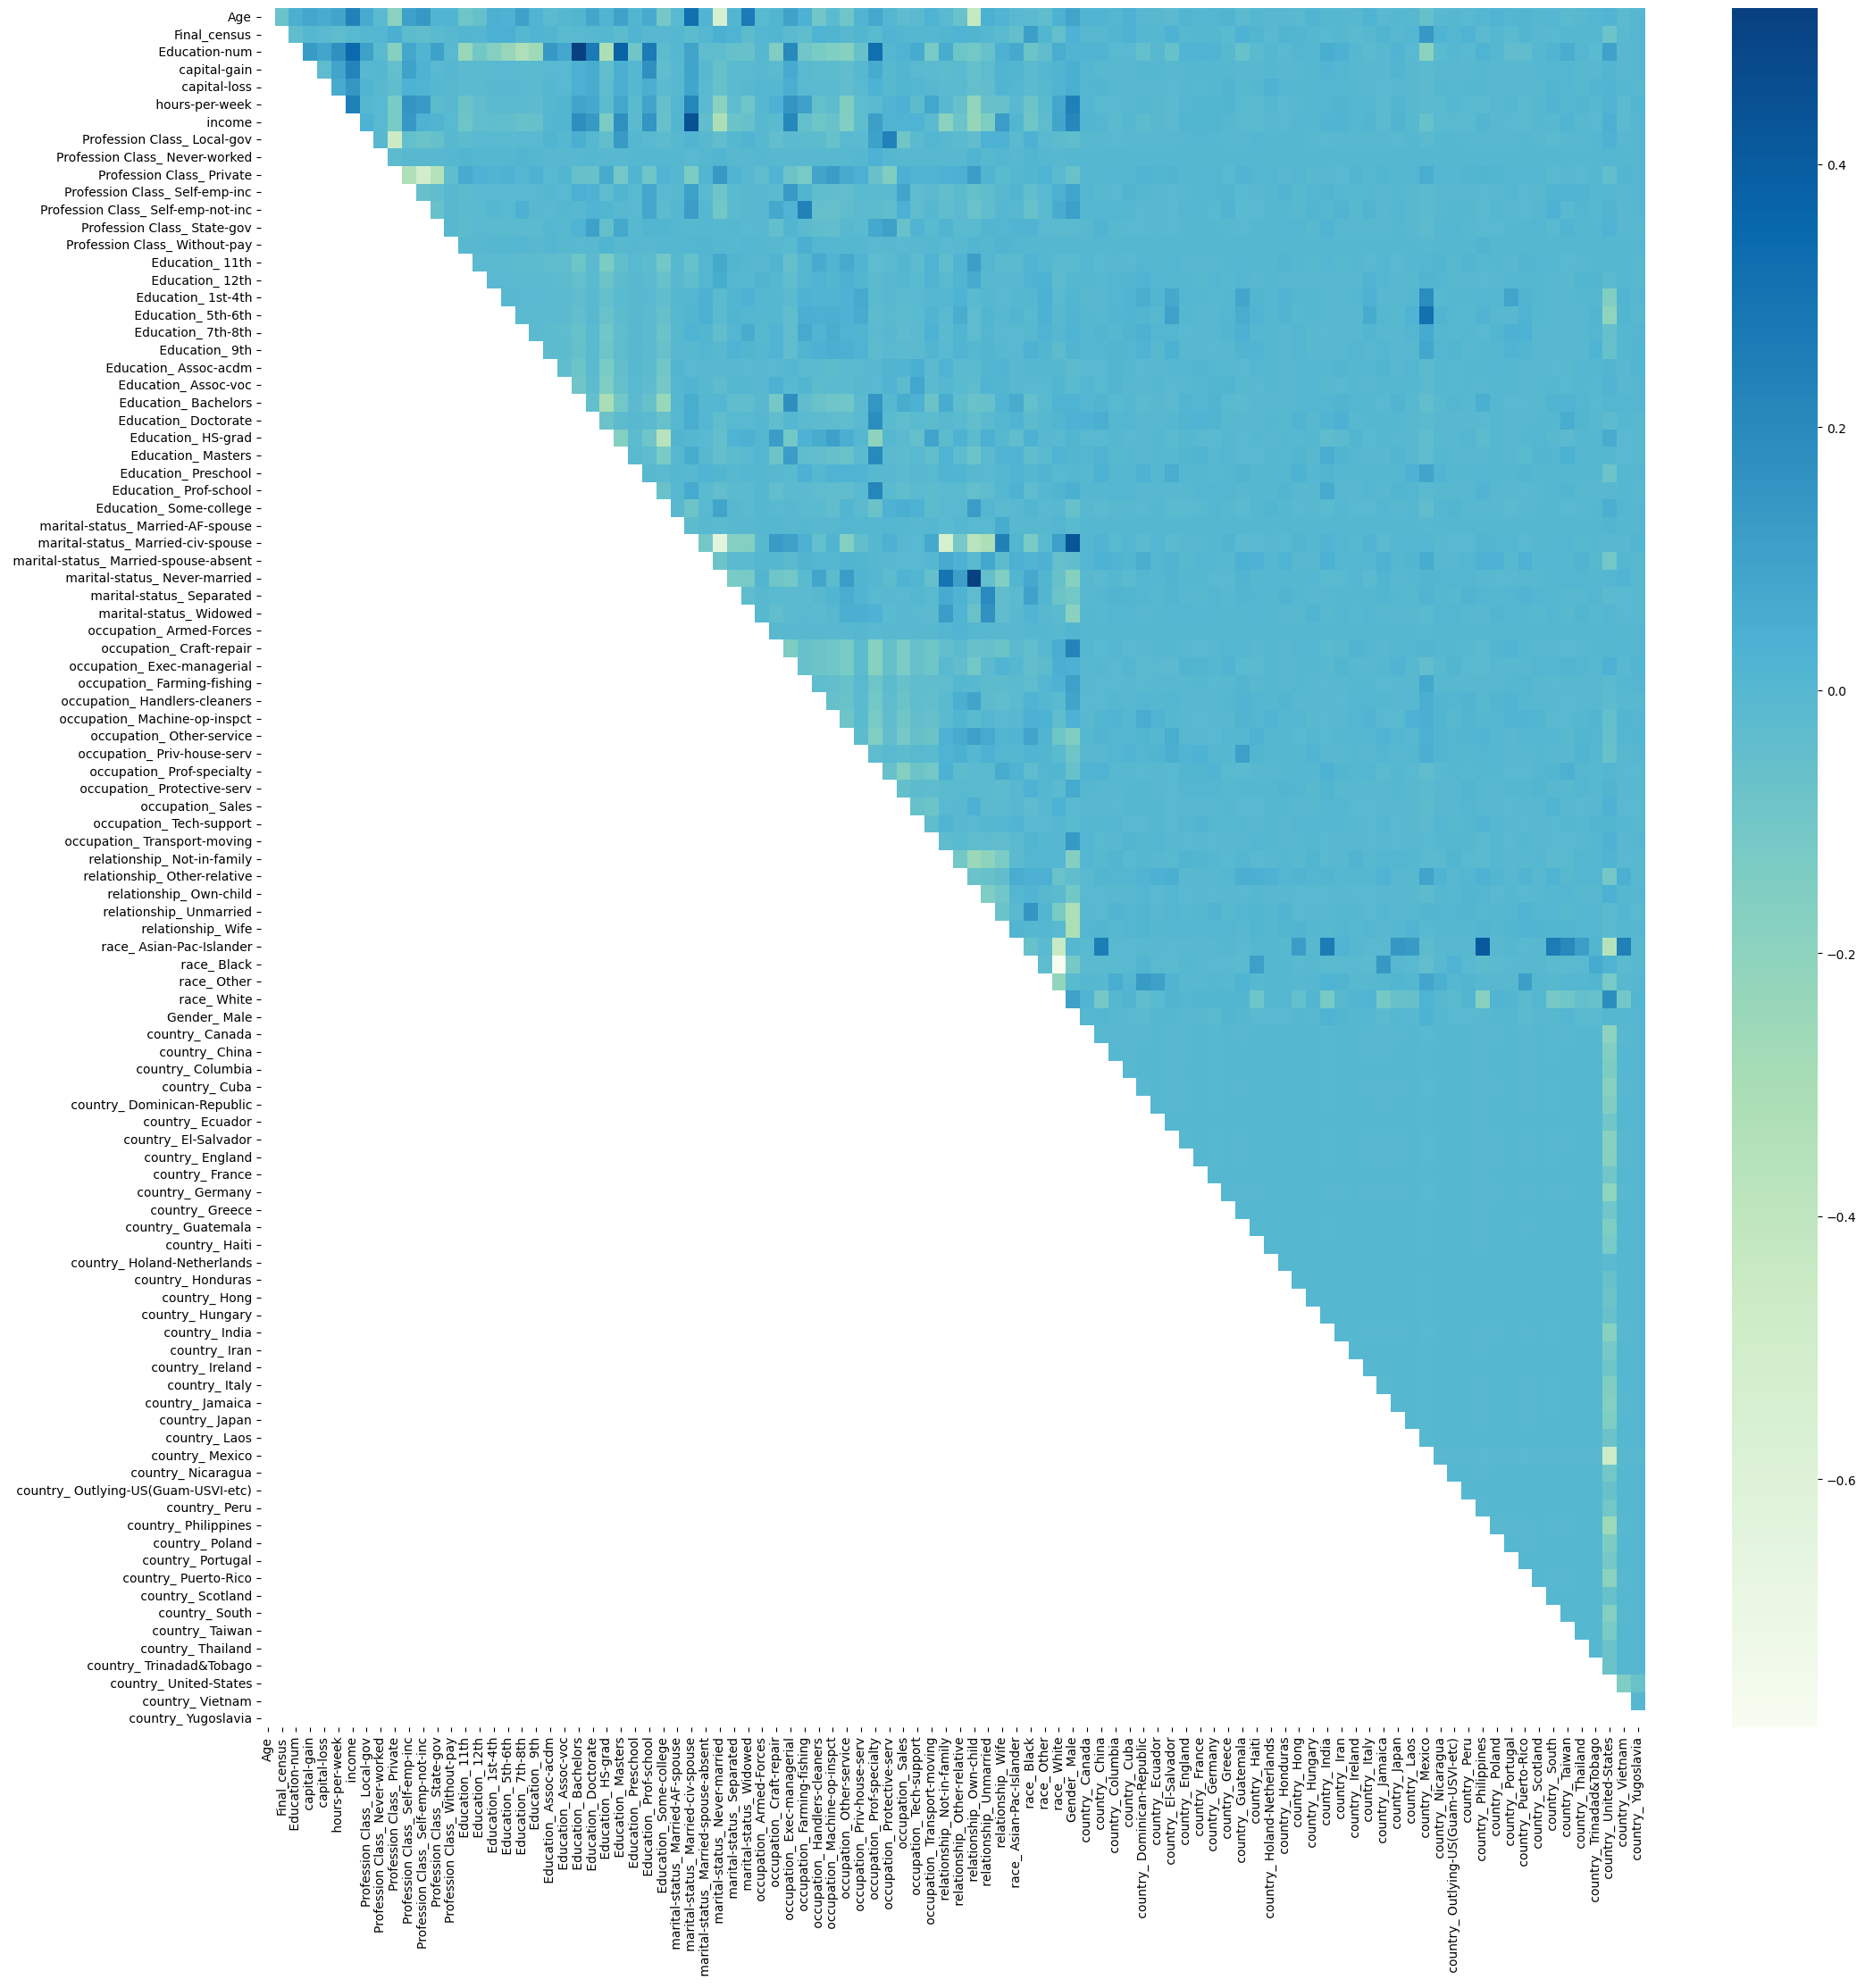

In [55]:
plt.figure(figsize=(25,25))
sns.heatmap(upper_mat,cmap='GnBu')
plt.show()

In [56]:
high_positive_corr = [i for i in upper_mat.columns if any(upper_mat[i]>0.8)]
high_negative_corr = [j for j in upper_mat.columns if any(upper_mat[j]<-0.8)]

In [57]:
High_corr = high_negative_corr+high_positive_corr
High_corr

[]

### Inferences on Multi Collinearity

   We do not have any columns with high positive or negative multi collinearity in our dataset

### Dependant and Independant dataset

In [58]:
X = data.drop([' income'],axis=1)
Y = data[' income']

### Feature Selection

In [59]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [60]:
feature_kbest = SelectKBest(score_func=mutual_info_classif)

In [61]:
feature_kbest.fit(X,Y)

SelectKBest(score_func=<function mutual_info_classif at 0x00000270BD83C9D0>)

In [62]:
Feature_score = pd.DataFrame()

In [63]:
Feature_score["Column"] = X.columns
Feature_score["Mutual_Score"] = feature_kbest.scores_

In [64]:
Feature_Sorted = Feature_score.sort_values(by='Mutual_Score',ascending=False,ignore_index=True)
Feature_Sorted

,Column,Mutual_Score
0,marital-status_ Married-civ-spouse,0.106234
1,capital-gain,0.078076
2,Age,0.067384
3,Education-num,0.064186
4,marital-status_ Never-married,0.063373
5,hours-per-week,0.043582
6,relationship_ Own-child,0.039166
7,capital-loss,0.037451
8,Final_census,0.032676
9,Gender_ Male,0.029946


In [65]:
Percentage = [(i/sum(Feature_Sorted['Mutual_Score']))*100 for i in Feature_Sorted['Mutual_Score']]
Cum_List = []
a= 0
for i in Percentage:
    Cum_List.append(a+i)
    a=a+i

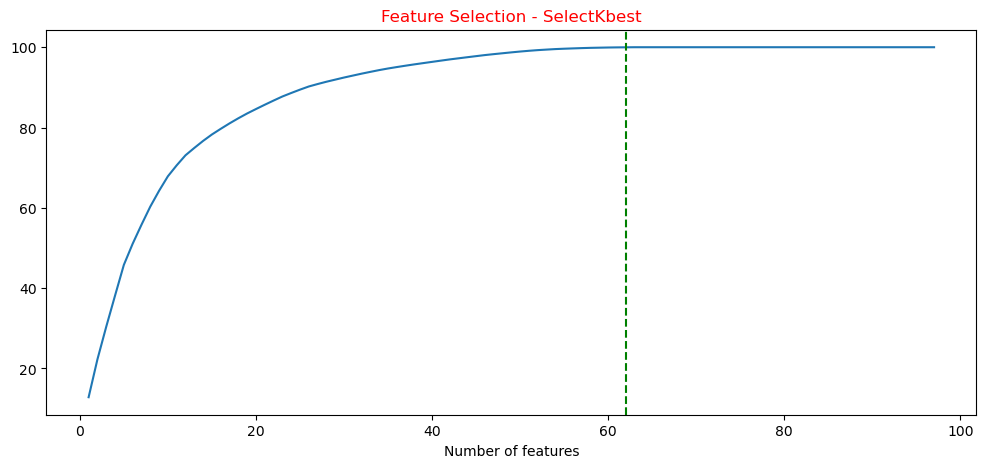

In [66]:
plt.figure(figsize=(12,5))
graph = sns.lineplot(range(1,98),Cum_List)
graph.axvline(62,ls="--",color='g')
plt.title("Feature Selection - SelectKbest",color='r')
plt.xlabel('Number of features')
plt.show()

### Inferences from Feature selection

   We can see that **Top 62 fields** have considerable amount of mutual scores rather than Zero(Approx).
    So we can chose those field alone for our model.

In [67]:
Unwanted_Features = list(Feature_Sorted['Column'][63:])

In [68]:
X_feature = X.copy()

In [69]:
X_feature.drop(columns=Unwanted_Features,axis=1,inplace=True)

In [70]:
X_feature.shape

(32561, 63)

###  Train test split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_Model, X_test , Y_Model , Y_test = train_test_split(X_feature,Y,test_size=0.2,random_state=10,stratify=Y)

In [73]:
X_train, X_validate , Y_train , Y_validate = train_test_split(X_Model,Y_Model,test_size=0.2,random_state=10,stratify=Y_Model)

In [74]:
Split_data = pd.DataFrame()

In [75]:
Split_data['Data'] = ['Train','Validate','Test']

In [76]:
Split_data['Size'] = [X_train.shape[0],X_validate.shape[0],X_test.shape[0]]
Split_data.head()

,Data,Size
0,Train,20838
1,Validate,5210
2,Test,6513


### Scaling the data

In [105]:
from sklearn.preprocessing import RobustScaler

In [106]:
scaler = RobustScaler().fit(X_train)

In [107]:
X_Scale_train = scaler.transform(X_train)

In [108]:
X_train = pd.DataFrame(X_Scale_train,columns=X_feature.columns)
X_train.head()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Education_ 11th,Education_ 12th,Education_ 7th-8th,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Never-married,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Prof-specialty,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,Gender_ Male,country_ Canada,country_ China,country_ Columbia,country_ Ecuador,country_ France,country_ Greece,country_ Guatemala,country_ Haiti,country_ Hong,country_ Hungary,country_ India,country_ Ireland,country_ Nicaragua,country_ Outlying-US(Guam-USVI-etc),country_ Peru,country_ Philippines,country_ Poland,country_ South,country_ Taiwan,country_ Trinadad&Tobago,country_ United-States,country_ Yugoslavia
0,0.15,-1.127809,-0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.05,-0.457545,0.000000,0.0,0.323232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.35,-0.494537,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.75,0.118833,-0.333333,0.0,0.000000,-1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.05,0.759558,-0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
X_Scale_validate = scaler.transform(X_validate)

In [110]:
X_validate = pd.DataFrame(X_Scale_validate,columns=X_feature.columns)
X_validate.shape

(5210, 63)

In [111]:
X_Scale_test = scaler.transform(X_test)

In [112]:
X_test = pd.DataFrame(X_Scale_test,columns=X_feature.columns)
X_test.shape

(6513, 63)

### Model Building

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier

In [114]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()
light = LGBMClassifier()
ada = AdaBoostClassifier()

In [115]:
ML_model = [LR,KNN,gnb,dt,rf,light,svc,ada]

### Model Evaluation

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
for model in ML_model:
    print("=========="*5)
    print("Performance of", model)
    print("-------"*5)
    
    alg=model.fit(X_train,Y_train)
    y_pred_train=alg.predict(X_train)
    y_pred_validate=alg.predict(X_validate)
    train=accuracy_score(Y_train,y_pred_train)
    validate=accuracy_score(Y_validate,y_pred_validate)
    
    # printing the metrics
    
    print(f"Training Accuracy score {(train)*100:.2f}%")
    print(f"Validation Accuracy score {(validate)*100:.2f}%")

    print('\n')

Performance of LogisticRegression()
-----------------------------------
Training Accuracy score 84.86%
Validation Accuracy score 84.11%


Performance of KNeighborsClassifier()
-----------------------------------
Training Accuracy score 87.08%
Validation Accuracy score 80.98%


Performance of GaussianNB()
-----------------------------------
Training Accuracy score 57.95%
Validation Accuracy score 56.89%


Performance of DecisionTreeClassifier()
-----------------------------------
Training Accuracy score 100.00%
Validation Accuracy score 80.83%


Performance of RandomForestClassifier()
-----------------------------------
Training Accuracy score 100.00%
Validation Accuracy score 84.30%


Performance of LGBMClassifier()
-----------------------------------
Training Accuracy score 88.90%
Validation Accuracy score 86.41%


Performance of SVC()
-----------------------------------
Training Accuracy score 85.11%
Validation Accuracy score 83.32%


Performance of AdaBoostClassifier()
-------------

### Selection of top performing models

   From the accuracy we can conclude __SVC , Adaboost and LGBM classifiers__ performs the best.
   So we can further improve these model by hyperparameter tuning than all the algorithms

### Over sampling

   Since there is imbalance in the dataset ( the income with less than 50k is __3 times__ more in the dataset than the income with greater than 50k) it is better to over sample the dataset and see its performance.

In [118]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN

In [119]:
#Before Sampling
Y_train.value_counts()

0    15820
1     5018
Name:  income, dtype: int64

In [120]:
#RandomOverSampler

X_train_over_1 , Y_train_over_1 = RandomOverSampler().fit_resample(X_train,Y_train)
Y_train_over_1.value_counts()

0    15820
1    15820
Name:  income, dtype: int64

In [121]:
#SMOTE

X_train_over_2 , Y_train_over_2 = SMOTE().fit_resample(X_train,Y_train)
Y_train_over_2.value_counts()

0    15820
1    15820
Name:  income, dtype: int64

In [122]:
# ADASYN

X_train_over_3 , Y_train_over_3 = SMOTE().fit_resample(X_train,Y_train)
Y_train_over_3.value_counts()

0    15820
1    15820
Name:  income, dtype: int64

In [123]:
ML_models = [light , svc , ada]

### Performance after sampling

In [124]:
Train_test_over = [("Random_Over_Sampler",X_train_over_1,Y_train_over_1),
                   ("SMOTE",X_train_over_2,Y_train_over_2),
                   ("ADASYN",X_train_over_3,Y_train_over_3)]


for i,j,k in Train_test_over:
    print("=========="*5)
    print(i)
    print("=========="*5)
    
    for model in ML_models:
    
        print("Performance of", model)
        print("-------"*5)
    
        alg=model.fit(j,k)
        y_pred_train=alg.predict(j)
        y_pred_validate=alg.predict(X_validate)
        train=accuracy_score(k,y_pred_train)
        validate=accuracy_score(Y_validate,y_pred_validate)
    
        # printing the metrics
    
        print(f"Training Accuracy score {(train)*100:.2f}%")
        print(f"Validation Accuracy score {(validate)*100:.2f}%")

        print('\n')

Random_Over_Sampler
Performance of LGBMClassifier()
-----------------------------------
Training Accuracy score 87.53%
Validation Accuracy score 82.86%


Performance of SVC()
-----------------------------------
Training Accuracy score 83.88%
Validation Accuracy score 79.10%


Performance of AdaBoostClassifier()
-----------------------------------
Training Accuracy score 83.22%
Validation Accuracy score 81.73%


SMOTE
Performance of LGBMClassifier()
-----------------------------------
Training Accuracy score 90.76%
Validation Accuracy score 84.61%


Performance of SVC()
-----------------------------------
Training Accuracy score 85.40%
Validation Accuracy score 79.69%


Performance of AdaBoostClassifier()
-----------------------------------
Training Accuracy score 85.46%
Validation Accuracy score 81.65%


ADASYN
Performance of LGBMClassifier()
-----------------------------------
Training Accuracy score 90.70%
Validation Accuracy score 84.76%


Performance of SVC()
----------------------

### Inference from the Sampling method

   By the over sampling approach the model does not yields better accuracy than the normal dataset.
   
   We can see the also see there is __overfitting__ with the over sampling approach so we can use the scaled dataset itself for further process.

### Hyperparameter tuning

In [125]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

### RandomizedSearchCV

In [126]:
lgbm_params = {"max_depth": np.arange(1,11),
               "n_estimators": [int(i) for i in np.linspace(100,1000,10)],
              "num_leaves" : np.arange(1,16,2),
              "min_child_samples" : np.arange(1,11,2),
              "min_child_weight": np.arange(0.001,0.011,0.001),
              "boosting_type" : ['gbdt','dart', 'goss','rf']}

In [127]:
ada_params = {"n_estimators": [int(i) for i in np.linspace(100,1000,10)],
              "learning_rate" : np.arange(0.1,1.1,0.1)}

In [128]:
svc_params = {"C":[0.1,1,10,20,50,100,1000],
              "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
              "gamma" : ['scale', 'auto']}

In [129]:
hyp_para = [("LGBM",LGBMClassifier(),lgbm_params),
            ("Adaboost",AdaBoostClassifier(),ada_params),
            ("SVC",SVC(),svc_params)]

In [130]:
model_param ={}
for model, regressor, param in hyp_para:
    random = RandomizedSearchCV(estimator=regressor,
                               param_distributions=param,
                               n_iter=300,
                               random_state=10,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train,Y_train)
    model_param[model] = random.best_params_

for i in model_param:
    print(f"---------------------{i}---------------------")
    print(model_param[i])

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 56 candidates, totalling 168 fits
---------------------LGBM---------------------
{'num_leaves': 7, 'n_estimators': 900, 'min_child_weight': 0.010000000000000002, 'min_child_samples': 9, 'max_depth': 3, 'boosting_type': 'dart'}
---------------------Adaboost---------------------
{'n_estimators': 400, 'learning_rate': 1.0}
---------------------SVC---------------------
{'kernel': 'rbf', 'gamma': 'auto', 'C': 100}


In [132]:
lgbm = LGBMClassifier(num_leaves= 7,n_estimators=900,min_child_weight= 0.01, min_child_samples=9, max_depth= 3, boosting_type= 'dart')
ada = AdaBoostClassifier(n_estimators=400,learning_rate=0.5)
svc = SVC(kernel='rbf',gamma='auto',C=100)

In [133]:
ML_models = [lgbm,ada,svc]

### Evaluation after tuning

In [134]:
for model in ML_models:
    print("=========="*5)
    print("Performance of", model)
    print("-------"*5)
    
    alg=model.fit(X_train,Y_train)
    y_pred_train=alg.predict(X_train)
    y_pred_validate=alg.predict(X_validate)
    train=accuracy_score(Y_train,y_pred_train)
    validate=accuracy_score(Y_validate,y_pred_validate)
    
    # printing the metrics
    
    print(f"Training Accuracy score {(train)*100:.2f}%")
    print(f"Validation Accuracy score {(validate)*100:.2f}%")

    print('\n')

Performance of LGBMClassifier(boosting_type='dart', max_depth=3, min_child_samples=9,
               min_child_weight=0.01, n_estimators=900, num_leaves=7)
-----------------------------------
Training Accuracy score 87.74%
Validation Accuracy score 86.51%


Performance of AdaBoostClassifier(learning_rate=0.5, n_estimators=400)
-----------------------------------
Training Accuracy score 86.86%
Validation Accuracy score 85.76%


Performance of SVC(C=100, gamma='auto')
-----------------------------------
Training Accuracy score 86.35%
Validation Accuracy score 84.63%




### GridsearchCV

In [139]:
lgbm_params = {"max_depth": np.arange(2,5),
               "n_estimators": [int(i) for i in np.linspace(800,1000,3)],
               "num_leaves" : np.arange(7,10),
               "min_child_samples" : np.arange(8,11),
               "min_child_weight": np.arange(0.009,0.012,0.001),
               "boosting_type" : ['dart']}

In [140]:
Grid = GridSearchCV(estimator=lgbm,
                    param_grid=lgbm_params,
                    cv=3,
                    n_jobs=-1)

In [141]:
Grid.fit(X_train,Y_train)
Grid.best_params_

{'boosting_type': 'dart',
 'max_depth': 4,
 'min_child_samples': 8,
 'min_child_weight': 0.009,
 'n_estimators': 1000,
 'num_leaves': 8}

### Final Model

In [142]:
lgbm = LGBMClassifier(num_leaves= 8,n_estimators=1000,min_child_weight= 0.009, min_child_samples=8, max_depth= 4, boosting_type= 'dart')

### Model Evaluation

In [143]:
from sklearn.metrics import confusion_matrix,classification_report

In [144]:
# LGBM fit

lgbm.fit(X_train,Y_train)


Y_Pred_train = lgbm.predict(X_train)
Accuracy_Train = accuracy_score(Y_train,Y_Pred_train)
print(f" Training accuracy of LGBM {Accuracy_Train*100:.2f}%")

Y_Pred_test = lgbm.predict(X_test)
Accuracy_Test = accuracy_score(Y_test,Y_Pred_test)
print(f" Testing accuracy of LGBM {Accuracy_Test*100:.2f}%")

Report = classification_report(Y_test,Y_Pred_test)
print(Report)

 Training accuracy of LGBM 88.23%
 Testing accuracy of LGBM 86.93%
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4945
           1       0.78      0.64      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513



### Conclusion

The results show that the LGBM Model performs well for our dataset after all preprocessing, model training, model evaluation, top model selection, hyperparameter tuning, and test data evaluation.


However we could also chose Adaboost model which yields closer result to our model.